In [ ]:
pip install optuna xgboost catboost lightgbm

# **Importing Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('default')
sns.set_palette("husl")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Matches.csv')

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")


Dataset loaded successfully!
Dataset shape: (228377, 42)
Rows: 228,377 | Columns: 42


# ***Exploratory Detailed Analysis***

In [ ]:
#  First look at the data structure
print("=== DATASET OVERVIEW ===")
print(f"Dataset Info:")
df.info()
display(df.head())
display(df.tail())

=== DATASET OVERVIEW ===
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228377 entries, 0 to 228376
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     228377 non-null  object 
 1   MatchDate    228377 non-null  object 
 2   MatchTime    96892 non-null   object 
 3   HomeTeam     228377 non-null  object 
 4   AwayTeam     228377 non-null  object 
 5   HomeElo      139910 non-null  float64
 6   AwayElo      139842 non-null  float64
 7   Form3Home    226877 non-null  float64
 8   Form5Home    226877 non-null  float64
 9   Form3Away    226877 non-null  float64
 10  Form5Away    226877 non-null  float64
 11  FTHome       228374 non-null  float64
 12  FTAway       228374 non-null  float64
 13  FTResult     228374 non-null  object 
 14  HTHome       173797 non-null  float64
 15  HTAway       173797 non-null  float64
 16  HTResult     173797 non-null  object 
 17  HomeShots    112555 non-null

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.3,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.4,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,NaN,Ajaccio,Le Mans,1470.87,1477.89,0.0,0.0,0.0,0.0,1.0,0.0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,NaN,Beauvais,Montpellier,1422.21,1606.00,0.0,0.0,0.0,0.0,1.0,3.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
228372,E0,2025-02-26,19:30:00,Brentford,Everton,1738.05,1731.52,6.0,9.0,5.0,11.0,1.0,1.0,D,1.0,0.0,H,12.0,14.0,3.0,4.0,3.0,6.0,2.0,5.0,2.0,1.0,0.0,0.0,2.02,3.68,3.59,2.06,3.82,3.67,1.85,1.99,1.89,2.04,-0.5,2.04,1.86
228373,E0,2025-02-26,19:30:00,Man United,Ipswich,1757.62,1584.51,1.0,4.0,1.0,1.0,3.0,2.0,H,2.0,2.0,D,10.0,12.0,6.0,3.0,9.0,16.0,5.0,6.0,4.0,4.0,1.0,0.0,1.52,4.55,5.83,1.56,4.75,6.50,1.64,2.29,1.69,2.34,-1.0,1.88,2.02
228374,E0,2025-02-26,19:30:00,Nott'm Forest,Arsenal,1788.28,1999.49,3.0,6.0,6.0,10.0,0.0,0.0,D,0.0,0.0,D,6.0,13.0,2.0,1.0,10.0,17.0,3.0,11.0,1.0,1.0,0.0,0.0,3.94,3.48,1.98,4.10,3.60,2.02,2.17,1.71,2.24,1.75,0.5,1.90,2.00
228375,E0,2025-02-26,19:30:00,Tottenham,Man City,1785.53,1926.48,9.0,9.0,3.0,9.0,0.0,1.0,A,0.0,1.0,A,11.0,12.0,6.0,5.0,12.0,15.0,8.0,3.0,3.0,0.0,0.0,0.0,3.22,4.09,2.04,3.35,4.25,2.10,1.34,3.29,1.37,3.40,0.5,1.84,2.06
228376,E0,2025-02-26,20:15:00,Liverpool,Newcastle,1995.58,1826.18,7.0,11.0,3.0,6.0,2.0,0.0,H,1.0,0.0,H,12.0,3.0,3.0,0.0,12.0,11.0,4.0,2.0,0.0,1.0,0.0,0.0,1.52,4.77,5.64,1.54,5.00,6.10,1.44,2.79,1.48,2.95,-1.0,1.75,2.05


In [ ]:
print("=== COLUMN ANALYSIS ===")
print(f"Total columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nData types distribution:")
print(df.dtypes.value_counts())

=== COLUMN ANALYSIS ===
Total columns: 42

Column names:
 1. Division
 2. MatchDate
 3. MatchTime
 4. HomeTeam
 5. AwayTeam
 6. HomeElo
 7. AwayElo
 8. Form3Home
 9. Form5Home
10. Form3Away
11. Form5Away
12. FTHome
13. FTAway
14. FTResult
15. HTHome
16. HTAway
17. HTResult
18. HomeShots
19. AwayShots
20. HomeTarget
21. AwayTarget
22. HomeFouls
23. AwayFouls
24. HomeCorners
25. AwayCorners
26. HomeYellow
27. AwayYellow
28. HomeRed
29. AwayRed
30. OddHome
31. OddDraw
32. OddAway
33. MaxHome
34. MaxDraw
35. MaxAway
36. Over25
37. Under25
38. MaxOver25
39. MaxUnder25
40. HandiSize
41. HandiHome
42. HandiAway

Data types distribution:
float64    35
object      7
Name: count, dtype: int64


In [ ]:
print("=== STATISTICAL SUMMARY ===")
print("Numerical columns summary:")
display(df.describe())

print(f"\nCategorical columns summary:")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    display(df[categorical_cols].describe())
else:
    print("No categorical columns found")

=== STATISTICAL SUMMARY ===
Numerical columns summary:


,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,HTHome,HTAway,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
count,139910.000000,139842.000000,226877.000000,226877.000000,226877.000000,226877.000000,228374.000000,228374.000000,173797.000000,173797.000000,112555.000000,112558.000000,111749.000000,111752.000000,111793.000000,111793.000000,112183.000000,112183.000000,117118.000000,117119.000000,117119.000000,117117.000000,225347.000000,225347.000000,225347.000000,200742.000000,200742.000000,200742.000000,146218.000000,146217.000000,146218.000000,146217.000000,154553.000000,154300.000000,154276.000000
mean,1532.963352,1533.012573,3.984670,6.721461,4.202925,6.927608,1.488458,1.149890,0.657411,0.502385,12.760908,10.414346,5.124985,4.143407,12.620871,13.080166,5.666402,4.617990,1.681791,1.984375,0.086340,0.117114,2.460052,3.609793,4.019582,2.674176,3.873779,4.513777,1.945049,1.891252,2.046240,1.985967,-0.303530,1.919515,1.955102
std,153.172398,153.221114,2.377063,3.256892,2.392875,3.269290,1.259044,1.112718,0.812317,0.715215,4.990563,4.453851,2.765648,2.430047,4.476443,4.550530,2.940378,2.624633,1.306543,1.373488,0.297375,0.346678,1.372111,0.847635,2.647195,1.802028,1.100686,3.818925,0.276526,0.333801,0.540455,0.722145,0.729571,0.498840,0.353940
min,1103.130000,1103.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.290000,1.010000,1.020000,1.200000,0.000000,1.090000,1.200000,1.110000,1.260000,-99.900000,0.000000,-0.500000
25%,1424.770000,1424.830000,2.000000,4.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,9.000000,10.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.750000,3.210000,2.600000,1.850000,3.400000,2.720000,1.750000,1.670000,1.830000,1.750000,-0.500000,1.830000,1.830000
50%,1515.445000,1515.440000,4.000000,7.000000,4.000000,7.000000,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,5.000000,4.000000,12.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.150000,3.400000,3.330000,2.300000,3.600000,3.600000,1.940000,1.820000,2.040000,1.910000,-0.300000,1.920000,1.930000
75%,1633.977500,1633.967500,6.000000,9.000000,6.000000,9.000000,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,7.000000,6.000000,15.000000,16.000000,7.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.670000,3.700000,4.500000,2.880000,3.970000,5.000000,2.120000,2.020000,2.250000,2.120000,0.000000,2.010000,2.020000
max,2107.480000,2107.480000,9.000000,15.000000,9.000000,15.000000,10.000000,13.000000,7.000000,7.000000,46.000000,45.000000,31.000000,23.000000,145.000000,77.000000,26.000000,23.000000,11.000000,10.000000,3.000000,9.000000,53.180000,22.550000,71.710000,126.000000,47.000000,301.000000,3.950000,6.750000,172.000000,238.000000,12.500000,177.000000,15.140000



Categorical columns summary:


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,FTResult,HTResult
count,228377,228377,96892,228377,228377,228374,173797
unique,38,7319,194,1214,1206,3,3
top,E1,2014-10-18,15:00:00,Preston,Millwall,H,D
freq,13462,175,14220,562,560,101928,73759


In [ ]:
all_features = [
    # Basic match information
    'Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'MatchTime',

    # Match results
    'FTHome', 'FTAway', 'FTResult',  # Full Time
    'HTHome', 'HTAway', 'HTResult',  # Half Time

    # ELO ratings
    'HomeElo', 'AwayElo',

    # Team form (recent performance)
    'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away',

    # Match statistics
    'HomeShots', 'AwayShots',
    'HomeTarget', 'AwayTarget',  # Shots on target
    'HomeFouls', 'AwayFouls',
    'HomeCorners', 'AwayCorners',
    'HomeYellow', 'AwayYellow',  # Yellow cards
    'HomeRed', 'AwayRed',        # Red cards

    # Betting odds
    'OddHome', 'OddDraw', 'OddAway',      # Standard odds
    'MaxHome', 'MaxDraw', 'MaxAway',      # Maximum odds

    # Over/Under betting
    'Over25', 'Under25',
    'MaxOver25', 'MaxUnder25',

    # Asian Handicap
    'HandiSize', 'HandiHome', 'HandiAway'
]

# Group features by category for analysis
feature_groups = {
    'Basic_Info': [
        'Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'MatchTime'
    ],
    'Match_Results': [
        'FTHome', 'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult'
    ],
    'ELO_Ratings': [
        'HomeElo', 'AwayElo'
    ],
    'Team_Form': [
        'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away'
    ],
    'Match_Statistics': [
        'HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget',
        'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners',
        'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed'
    ],
    'Standard_Odds': [
        'OddHome', 'OddDraw', 'OddAway'
    ],
    'Maximum_Odds': [
        'MaxHome', 'MaxDraw', 'MaxAway'
    ],
    'Over_Under_Betting': [
        'Over25', 'Under25', 'MaxOver25', 'MaxUnder25'
    ],
    'Handicap_Betting': [
        'HandiSize', 'HandiHome', 'HandiAway'
    ]
}

=== MISSING DATA ANALYSIS ===
Columns with missing data: 38


,Column,Missing_Count,Missing_Percentage
2,MatchTime,131485,57.573661
19,HomeTarget,116628,51.068190
20,AwayTarget,116625,51.066876
22,AwayFouls,116584,51.048923
21,HomeFouls,116584,51.048923
23,HomeCorners,116194,50.878153
24,AwayCorners,116194,50.878153
17,HomeShots,115822,50.715265
18,AwayShots,115819,50.713951
28,AwayRed,111260,48.717690


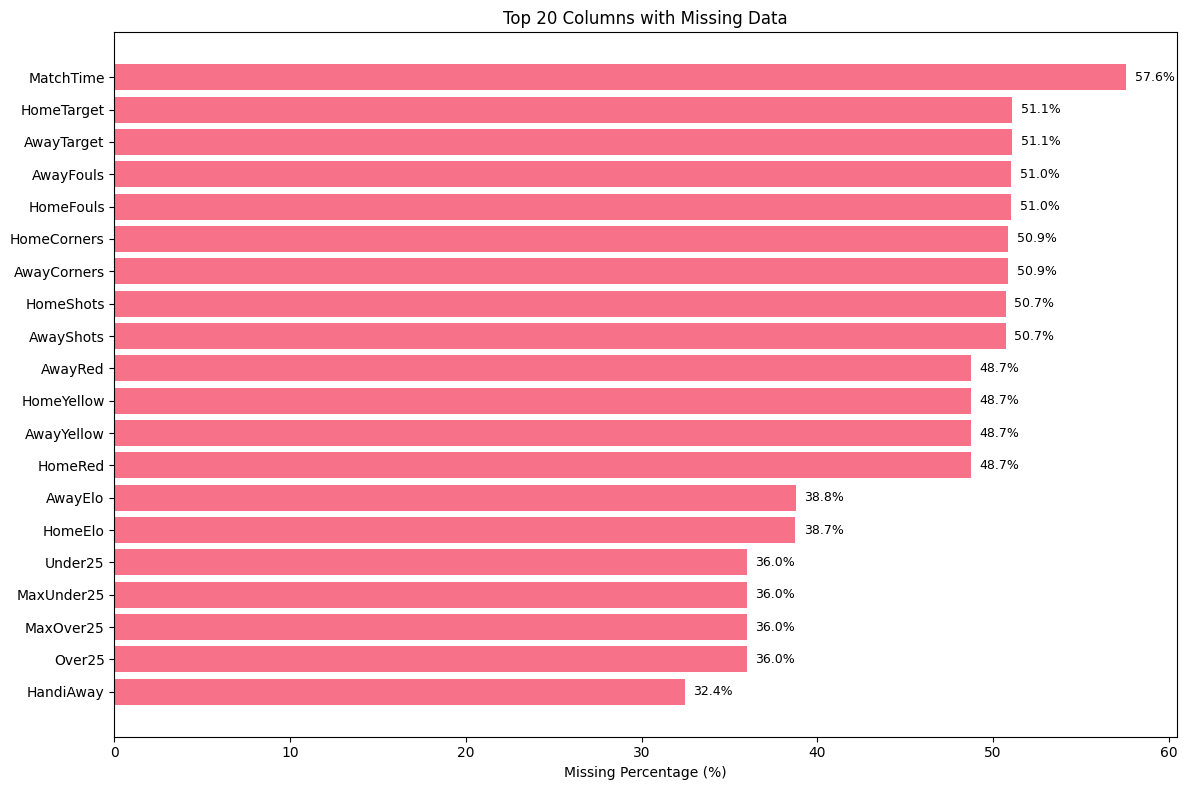

In [ ]:
##Missing data analysis
print("=== MISSING DATA ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_df) > 0:
    print(f"Columns with missing data: {len(missing_df)}")
    display(missing_df)

    # Visualize missing data
    plt.figure(figsize=(12, 8))
    if len(missing_df) > 20:
        top_missing = missing_df.head(20)
        plt.title('Top 20 Columns with Missing Data')
    else:
        top_missing = missing_df
        plt.title('Columns with Missing Data')

    bars = plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
    plt.yticks(range(len(top_missing)), top_missing['Column'])
    plt.xlabel('Missing Percentage (%)')
    plt.gca().invert_yaxis()

    # Add percentage labels on bars
    for i, (idx, row) in enumerate(top_missing.iterrows()):
        plt.text(row['Missing_Percentage'] + 0.5, i, f'{row["Missing_Percentage"]:.1f}%',
                va='center', fontsize=9)

    plt.tight_layout()
    plt.show()
else:
    print("No missing data found! ")

In [ ]:
###Duplicate analysis
print("=== DUPLICATE ANALYSIS ===")
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates:,}")

if total_duplicates > 0:
    print(f"Percentage of duplicates: {(total_duplicates/len(df)*100):.2f}%")

    # Show some duplicate examples
    print("\nSample duplicate rows:")
    duplicate_mask = df.duplicated(keep=False)
    sample_duplicates = df[duplicate_mask].head(10)
    display(sample_duplicates)
else:
    print("No exact duplicate rows found!")

#Check for potential duplicates based on key columns (if they exist)
potential_key_cols = ['date', 'home_team', 'away_team', 'league']
existing_key_cols = [col for col in potential_key_cols if col in df.columns]

if existing_key_cols:
    print(f"\nChecking for duplicates based on key columns: {existing_key_cols}")
    key_duplicates = df.duplicated(subset=existing_key_cols).sum()
    print(f"Potential duplicate matches: {key_duplicates:,}")

=== DUPLICATE ANALYSIS ===
Total duplicate rows: 0
No exact duplicate rows found!


In [ ]:
###Unique values analysis for categorical columns
print("=== UNIQUE VALUES ANALYSIS ===")
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    unique_analysis = []
    for col in categorical_cols:
        unique_count = df[col].nunique()
        unique_analysis.append({
            'Column': col,
            'Unique_Values': unique_count,
            'Sample_Values': list(df[col].dropna().unique()[:5])
        })

    unique_df = pd.DataFrame(unique_analysis)
    unique_df = unique_df.sort_values('Unique_Values', ascending=False)

    print("Categorical columns with unique value counts:")
    for _, row in unique_df.iterrows():
        print(f"\n{row['Column']}:")
        print(f"  - Unique values: {row['Unique_Values']:,}")
        print(f"  - Sample values: {row['Sample_Values']}")

        # Show top values for columns with reasonable number of categories
        if row['Unique_Values'] <= 50:
            print(f"  - Value counts:")
            value_counts = df[row['Column']].value_counts().head(10)
            for val, count in value_counts.items():
                print(f"    {val}: {count:,}")


=== UNIQUE VALUES ANALYSIS ===
Categorical columns with unique value counts:

MatchDate:
  - Unique values: 7,319
  - Sample values: ['2000-07-28', '2000-07-29', '2000-08-03', '2000-08-04', '2000-08-05']

HomeTeam:
  - Unique values: 1,214
  - Sample values: ['Marseille', 'Paris SG', 'Wasquehal', 'Ajaccio', 'Beauvais']

AwayTeam:
  - Unique values: 1,206
  - Sample values: ['Troyes', 'Strasbourg', 'Nancy', 'Le Mans', 'Montpellier']

MatchTime:
  - Unique values: 194
  - Sample values: ['03:00:00', '04:00:00', '13:00:00', '16:30:00', '17:00:00']

Division:
  - Unique values: 38
  - Sample values: ['F1', 'F2', 'D1', 'D2', 'T1']
  - Value counts:
    E1: 13,462
    E2: 13,055
    E3: 12,613
    SP2: 10,342
    I2: 9,811
    E0: 9,300
    I1: 8,891
    SP1: 8,878
    F1: 8,657
    F2: 8,587

FTResult:
  - Unique values: 3
  - Sample values: ['H', 'A', 'D']
  - Value counts:
    H: 101,928
    A: 65,870
    D: 60,576

HTResult:
  - Unique values: 3
  - Sample values: ['H', 'D', 'A']
  - Val

In [ ]:
# Cell: Data range and distribution analysis
print("=== DATA RANGE ANALYSIS ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    print("Numerical columns range analysis:")
    for col in numerical_cols:
        print(f"\n{col}:")
        print(f"  Min: {df[col].min()}")
        print(f"  Max: {df[col].max()}")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std: {df[col].std():.2f}")

        # Check for potential outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        print(f"  Potential outliers: {outliers:,} ({outliers/len(df)*100:.1f}%)")

=== DATA RANGE ANALYSIS ===
Numerical columns range analysis:

HomeElo:
  Min: 1103.13
  Max: 2107.48
  Mean: 1532.96
  Median: 1515.45
  Std: 153.17
  Potential outliers: 1,214 (0.5%)

AwayElo:
  Min: 1103.13
  Max: 2107.48
  Mean: 1533.01
  Median: 1515.44
  Std: 153.22
  Potential outliers: 1,215 (0.5%)

Form3Home:
  Min: 0.0
  Max: 9.0
  Mean: 3.98
  Median: 4.00
  Std: 2.38
  Potential outliers: 0 (0.0%)

Form5Home:
  Min: 0.0
  Max: 15.0
  Mean: 6.72
  Median: 7.00
  Std: 3.26
  Potential outliers: 0 (0.0%)

Form3Away:
  Min: 0.0
  Max: 9.0
  Mean: 4.20
  Median: 4.00
  Std: 2.39
  Potential outliers: 0 (0.0%)

Form5Away:
  Min: 0.0
  Max: 15.0
  Mean: 6.93
  Median: 7.00
  Std: 3.27
  Potential outliers: 0 (0.0%)

FTHome:
  Min: 0.0
  Max: 10.0
  Mean: 1.49
  Median: 1.00
  Std: 1.26
  Potential outliers: 15,832 (6.9%)

FTAway:
  Min: 0.0
  Max: 13.0
  Mean: 1.15
  Median: 1.00
  Std: 1.11
  Potential outliers: 542 (0.2%)

HTHome:
  Min: 0.0
  Max: 7.0
  Mean: 0.66
  Median: 0.0

=== QUICK VISUALIZATIONS ===


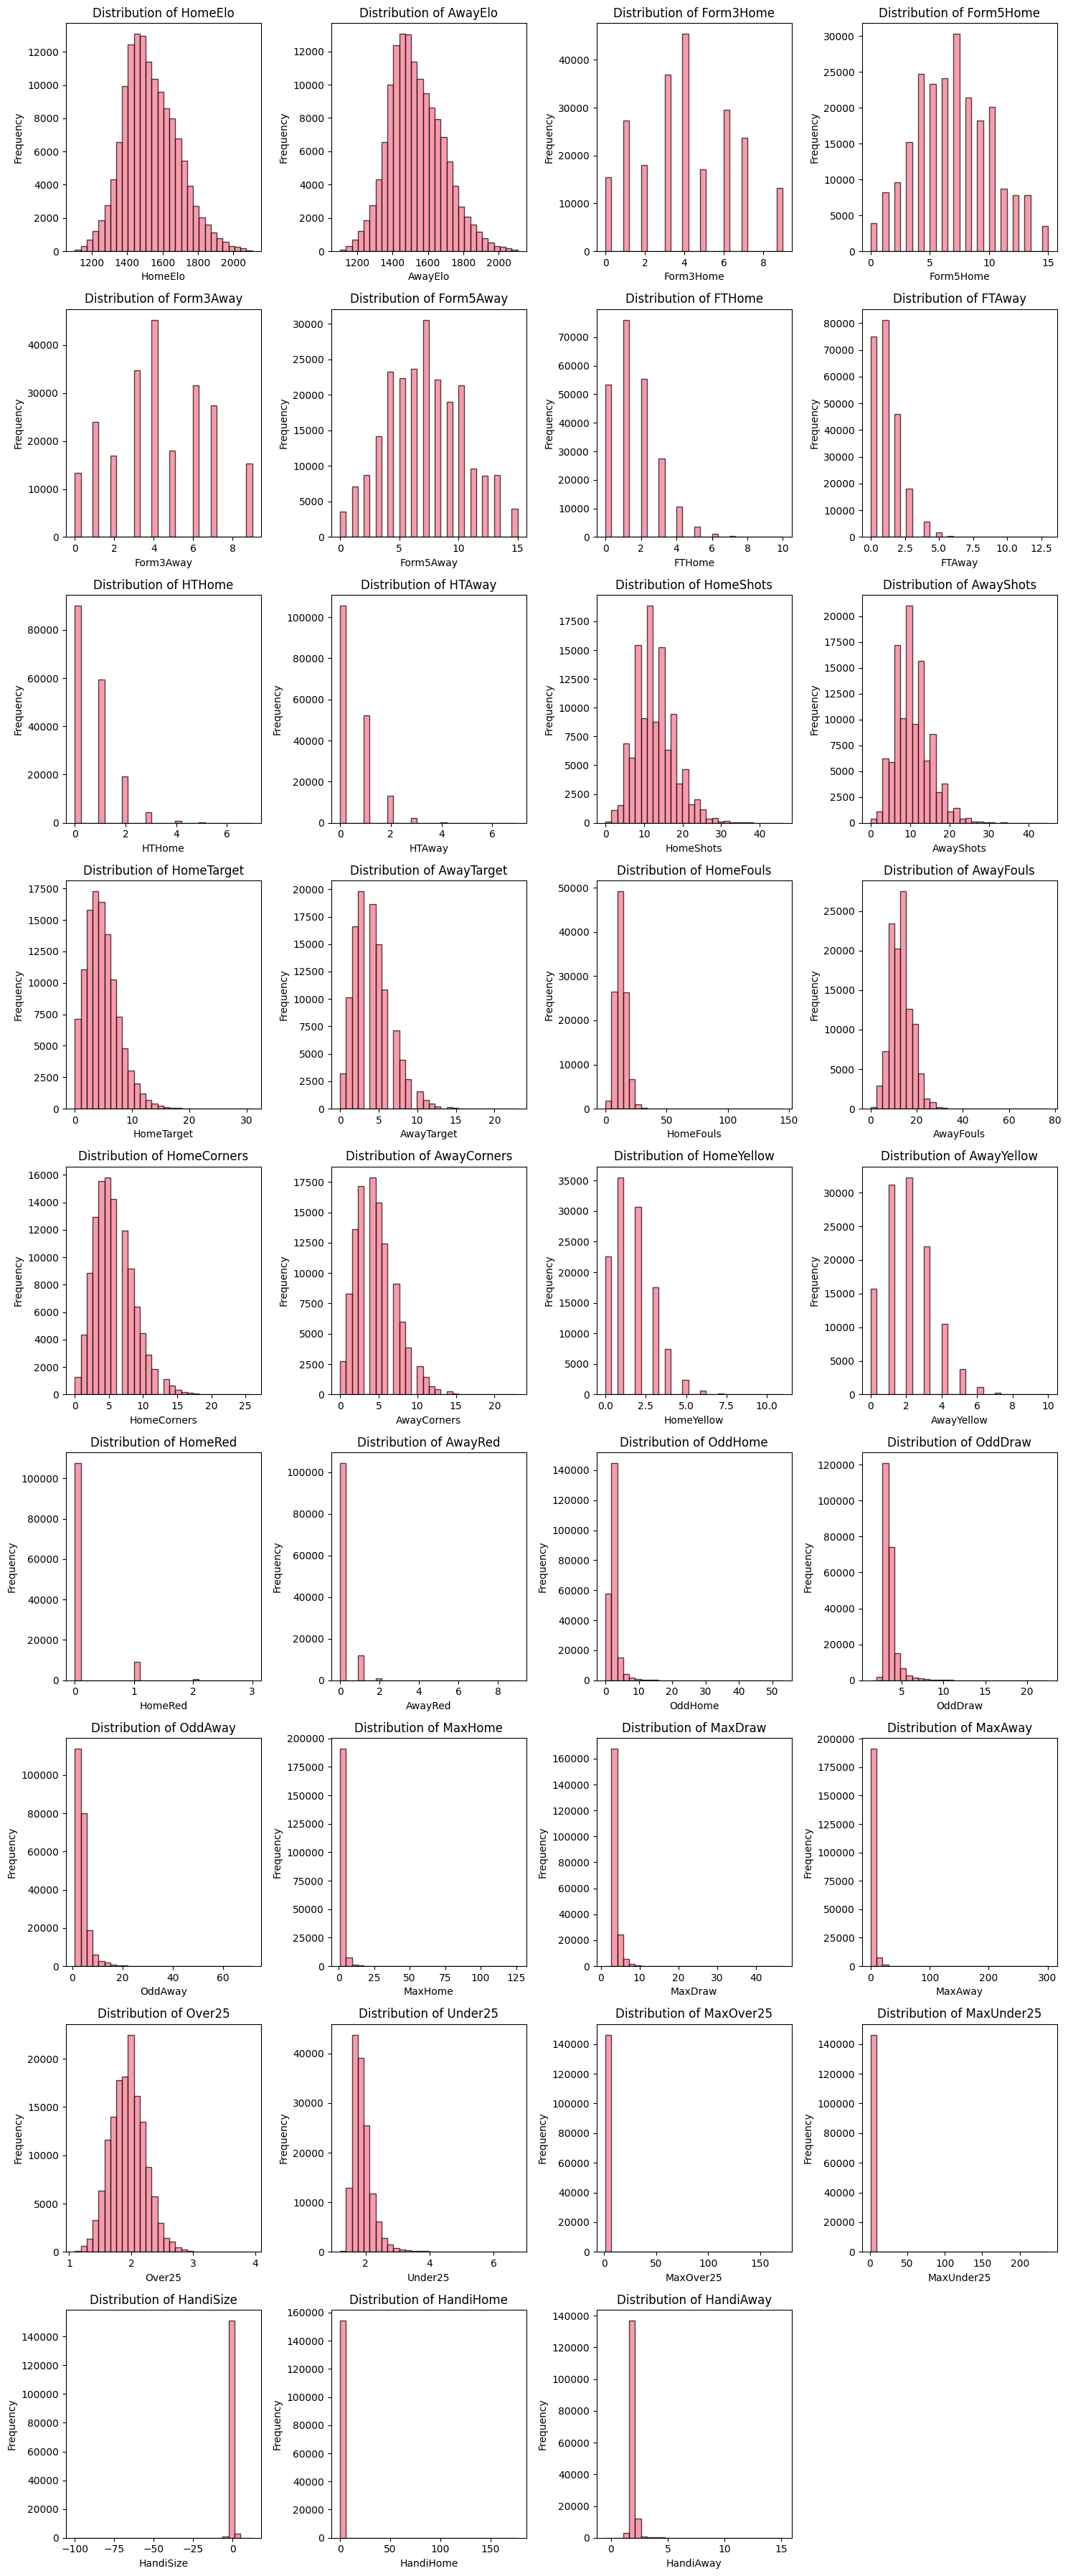

In [ ]:
print("=== QUICK VISUALIZATIONS ===")

# Create subplots for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    n_cols = min(4, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(numerical_cols[:min(42, len(numerical_cols))]):  # Limit to 12 plots
        if i < len(axes):
            axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')

    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

=== TEMPORAL ANALYSIS ===
Years present in dataset: [np.int32(2000), np.int32(2001), np.int32(2002), np.int32(2003), np.int32(2004), np.int32(2005), np.int32(2006), np.int32(2007), np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
Row count by year:
Year
2000     2794
2001     6329
2002     6173
2003     3967
2004     5534
2005     6340
2006     6959
2007     6585
2008     7148
2009     7054
2010     6925
2011     7410
2012    10597
2013    11729
2014    11993
2015    12352
2016    12100
2017    12364
2018    12042
2019    12018
2020     9562
2021    13127
2022    12168
2023    12501
2024    11148
2025     1458
Name: count, dtype: int64
Date range: 2000-07-28 00:00:00 to 2025-02-26 00:00:00
Years covered: 2000 to 2025
Total seasons: 25

Matches per yea

,count
Year,
2000,2794
2001,6329
2002,6173
2003,3967
2004,5534
2005,6340
2006,6959
2007,6585
2008,7148


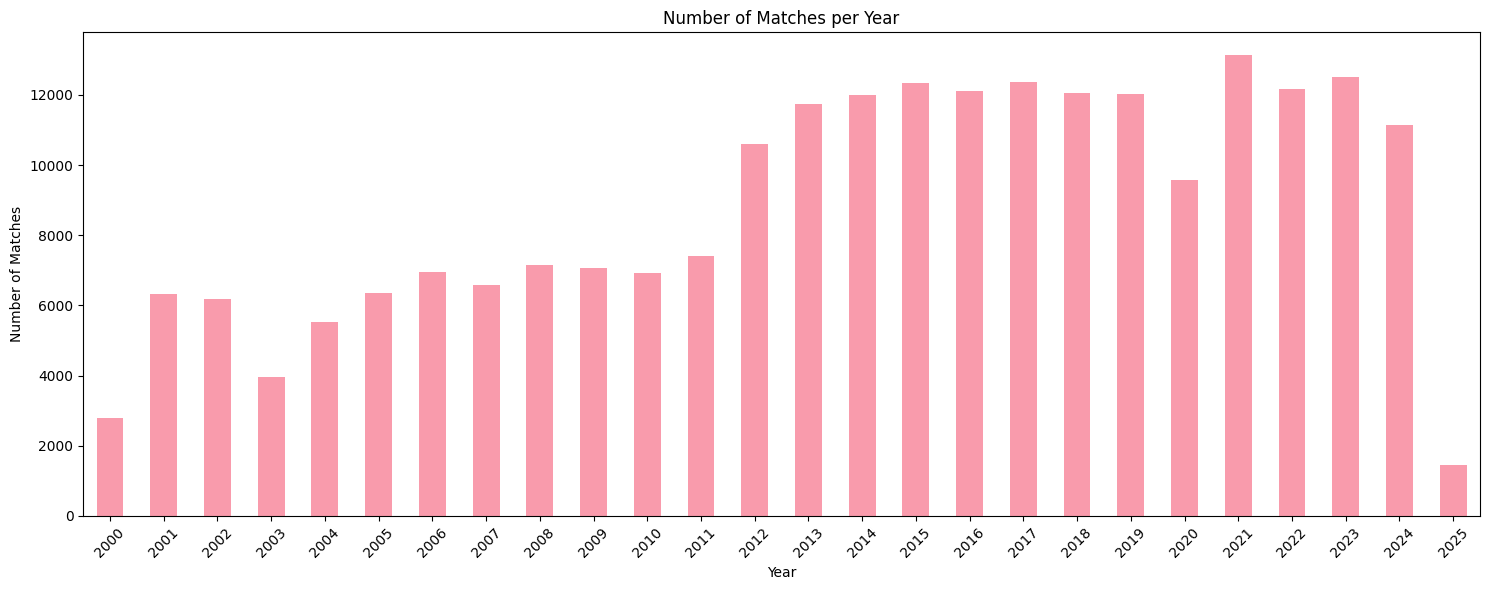

In [ ]:
 ###Date preprocessing and temporal analysis
print("=== TEMPORAL ANALYSIS ===")

# Convert MatchDate to datetime
df['MatchDate'] = pd.to_datetime(df['MatchDate'], errors='coerce')

# Extract temporal features
df['Year'] = df['MatchDate'].dt.year
print(f"Years present in dataset: {sorted(df['Year'].unique())}")
print(f"Row count by year:\n{df['Year'].value_counts().sort_index()}")

df['Month'] = df['MatchDate'].dt.month
df['DayOfWeek'] = df['MatchDate'].dt.dayofweek
df['Season'] = df['Year'].apply(lambda x: f"{x-1}/{x}" if x >= 2001 else f"{x}/{x+1}")

print(f"Date range: {df['MatchDate'].min()} to {df['MatchDate'].max()}")
print(f"Years covered: {df['Year'].min()} to {df['Year'].max()}")
print(f"Total seasons: {df['Season'].nunique()}")

# Matches per year
yearly_counts = df['Year'].value_counts().sort_index()
print(f"\nMatches per year:")
display(yearly_counts.head(26))

# Visualize matches over time
plt.figure(figsize=(15, 6))
yearly_counts.plot(kind='bar', alpha=0.7)
plt.title('Number of Matches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#######Missing data patterns by year and league
print("Missing data percentage by year for ALL features:")


missing_by_year_comprehensive = []
for year in sorted(df['Year'].unique()):
    year_data = df[df['Year'] == year]
    year_missing = {
        'Year': year,
        'Matches': len(year_data)
    }
    for feature in all_features:
        if feature in df.columns:
            missing_pct = (year_data[feature].isnull().sum() / len(year_data)) * 100
            year_missing[feature] = missing_pct
    missing_by_year_comprehensive.append(year_missing)

missing_by_year_df_full = pd.DataFrame(missing_by_year_comprehensive)
print(f"ALL {len(missing_by_year_df_full)} years - Missing Data % by Feature Groups:")


# Display by feature groups for better organization
for group_name, features in feature_groups.items():
    print(f"\n=== {group_name.upper()} FEATURES ===")

    # Create columns for this group (Year, Matches + group features)
    group_cols = ['Year', 'Matches'] + [f for f in features if f in df.columns]

    if len(group_cols) > 2:  # Only display if group has features in dataset
        print(f"Features in this group: {len(group_cols)-2}")
        display(missing_by_year_df_full[group_cols])

# Option: Also show a summary table with key features for quick overview
print(f"\n=== QUICK OVERVIEW - KEY FEATURES ===")
key_features = ['Year', 'Matches', 'HomeElo', 'AwayElo', 'OddHome', 'HomeShots', 'Over25']
available_key_features = [f for f in key_features if f in missing_by_year_df_full.columns]
display(missing_by_year_df_full[available_key_features])

pd.reset_option('display.max_rows')
# Show missing data summary by feature groups
print(f"\nMissing Data Summary by Feature Groups:")
for group_name, features in feature_groups.items():
    print(f"\n{group_name}:")
    group_missing = {}
    for feature in features:
        if feature in df.columns:
            missing_pct = (df[feature].isnull().sum() / len(df)) * 100
            group_missing[feature] = missing_pct

    group_df = pd.DataFrame(list(group_missing.items()), columns=['Feature', 'Missing_%'])
    group_df = group_df.sort_values('Missing_%', ascending=False)
    display(group_df)




Missing data percentage by year for ALL features:
ALL 26 years - Missing Data % by Feature Groups:

=== BASIC_INFO FEATURES ===
Features in this group: 5


,Year,Matches,Division,MatchDate,HomeTeam,AwayTeam,MatchTime
0,2000,2794,0.0,0.0,0.0,0.0,100.000000
1,2001,6329,0.0,0.0,0.0,0.0,100.000000
2,2002,6173,0.0,0.0,0.0,0.0,100.000000
3,2003,3967,0.0,0.0,0.0,0.0,100.000000
4,2004,5534,0.0,0.0,0.0,0.0,100.000000
5,2005,6340,0.0,0.0,0.0,0.0,100.000000
6,2006,6959,0.0,0.0,0.0,0.0,100.000000
7,2007,6585,0.0,0.0,0.0,0.0,100.000000
8,2008,7148,0.0,0.0,0.0,0.0,100.000000
9,2009,7054,0.0,0.0,0.0,0.0,100.000000



=== MATCH_RESULTS FEATURES ===
Features in this group: 6


,Year,Matches,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult
0,2000,2794,0.000000,0.000000,0.000000,0.035791,0.035791,0.035791
1,2001,6329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2002,6173,0.000000,0.000000,0.000000,0.016200,0.016200,0.016200
3,2003,3967,0.000000,0.000000,0.000000,0.025208,0.025208,0.025208
4,2004,5534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2005,6340,0.000000,0.000000,0.000000,0.015773,0.015773,0.015773
6,2006,6959,0.000000,0.000000,0.000000,0.014370,0.014370,0.014370
7,2007,6585,0.000000,0.000000,0.000000,0.030372,0.030372,0.030372
8,2008,7148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2009,7054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



=== ELO_RATINGS FEATURES ===
Features in this group: 2


,Year,Matches,HomeElo,AwayElo
0,2000,2794,10.128848,10.272011
1,2001,6329,18.865540,18.865540
2,2002,6173,25.449538,25.417139
3,2003,3967,23.468616,23.519032
4,2004,5534,25.243947,25.298157
5,2005,6340,23.075710,23.296530
6,2006,6959,24.356948,24.385688
7,2007,6585,24.388762,24.267274
8,2008,7148,23.573027,23.992725
9,2009,7054,23.433513,23.490218



=== TEAM_FORM FEATURES ===
Features in this group: 4


,Year,Matches,Form3Home,Form5Home,Form3Away,Form5Away
0,2000,2794,0.000000,0.000000,0.000000,0.000000
1,2001,6329,0.000000,0.000000,0.000000,0.000000
2,2002,6173,0.000000,0.000000,0.000000,0.000000
3,2003,3967,0.000000,0.000000,0.000000,0.000000
4,2004,5534,0.000000,0.000000,0.000000,0.000000
5,2005,6340,0.000000,0.000000,0.000000,0.000000
6,2006,6959,0.000000,0.000000,0.000000,0.000000
7,2007,6585,0.000000,0.000000,0.000000,0.000000
8,2008,7148,0.000000,0.000000,0.000000,0.000000
9,2009,7054,0.000000,0.000000,0.000000,0.000000



=== MATCH_STATISTICS FEATURES ===
Features in this group: 12


,Year,Matches,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
0,2000,2794,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,60.486757,60.486757,60.486757,60.486757
1,2001,6329,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.621583,54.621583,54.621583,54.621583
2,2002,6173,54.527782,54.479184,54.527782,54.479184,54.479184,54.479184,54.479184,54.479184,54.414385,54.414385,54.414385,54.414385
3,2003,3967,54.550038,54.550038,56.793547,56.793547,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038
4,2004,5534,62.486447,62.486447,67.148536,67.148536,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447
5,2005,6340,57.602524,57.602524,62.429022,62.429022,60.536278,60.536278,60.536278,60.536278,57.381703,57.381703,57.381703,57.381703
6,2006,6959,46.472194,46.472194,48.670786,48.670786,51.904009,51.904009,49.188102,49.188102,46.457824,46.457824,46.457824,46.457824
7,2007,6585,46.119970,46.119970,46.119970,46.119970,49.020501,49.020501,46.119970,46.119970,46.119970,46.119970,46.119970,46.119970
8,2008,7148,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531
9,2009,7054,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838



=== STANDARD_ODDS FEATURES ===
Features in this group: 3


,Year,Matches,OddHome,OddDraw,OddAway
0,2000,2794,20.901933,20.901933,20.901933
1,2001,6329,27.950703,27.950703,27.950703
2,2002,6173,2.105945,2.105945,2.105945
3,2003,3967,0.781447,0.781447,0.781447
4,2004,5534,3.758583,3.758583,3.758583
5,2005,6340,0.552050,0.552050,0.552050
6,2006,6959,0.215548,0.215548,0.215548
7,2007,6585,0.121488,0.121488,0.121488
8,2008,7148,0.097929,0.097929,0.097929
9,2009,7054,0.127587,0.127587,0.127587



=== MAXIMUM_ODDS FEATURES ===
Features in this group: 3


,Year,Matches,MaxHome,MaxDraw,MaxAway
0,2000,2794,100.000000,100.000000,100.000000
1,2001,6329,100.000000,100.000000,100.000000
2,2002,6173,100.000000,100.000000,100.000000
3,2003,3967,100.000000,100.000000,100.000000
4,2004,5534,100.000000,100.000000,100.000000
5,2005,6340,41.876972,41.876972,41.876972
6,2006,6959,0.143699,0.143699,0.143699
7,2007,6585,0.045558,0.045558,0.045558
8,2008,7148,0.167879,0.167879,0.167879
9,2009,7054,0.184293,0.184293,0.184293



=== OVER_UNDER_BETTING FEATURES ===
Features in this group: 4


,Year,Matches,Over25,Under25,MaxOver25,MaxUnder25
0,2000,2794,100.000000,100.000000,100.000000,100.000000
1,2001,6329,100.000000,100.000000,100.000000,100.000000
2,2002,6173,100.000000,100.000000,100.000000,100.000000
3,2003,3967,100.000000,100.000000,100.000000,100.000000
4,2004,5534,100.000000,100.000000,100.000000,100.000000
5,2005,6340,41.924290,41.924290,41.924290,41.924290
6,2006,6959,0.186808,0.186808,0.186808,0.186808
7,2007,6585,0.060744,0.060744,0.060744,0.060744
8,2008,7148,0.251819,0.251819,0.251819,0.251819
9,2009,7054,0.240998,0.240998,0.240998,0.240998



=== HANDICAP_BETTING FEATURES ===
Features in this group: 3


,Year,Matches,HandiSize,HandiHome,HandiAway
0,2000,2794,100.000000,100.000000,100.000000
1,2001,6329,100.000000,100.000000,100.000000
2,2002,6173,100.000000,100.000000,100.000000
3,2003,3967,65.944038,65.414671,65.944038
4,2004,5534,10.823997,10.787857,10.787857
5,2005,6340,5.725552,5.725552,5.725552
6,2006,6959,0.344877,0.344877,0.359247
7,2007,6585,0.151860,0.151860,0.151860
8,2008,7148,0.293788,0.293788,0.293788
9,2009,7054,0.255174,0.255174,0.269351



=== QUICK OVERVIEW - KEY FEATURES ===


,Year,Matches,HomeElo,AwayElo,OddHome,HomeShots,Over25
0,2000,2794,10.128848,10.272011,20.901933,66.141732,100.000000
1,2001,6329,18.865540,18.865540,27.950703,54.747985,100.000000
2,2002,6173,25.449538,25.417139,2.105945,54.527782,100.000000
3,2003,3967,23.468616,23.519032,0.781447,54.550038,100.000000
4,2004,5534,25.243947,25.298157,3.758583,62.486447,100.000000
5,2005,6340,23.075710,23.296530,0.552050,57.602524,41.924290
6,2006,6959,24.356948,24.385688,0.215548,46.472194,0.186808
7,2007,6585,24.388762,24.267274,0.121488,46.119970,0.060744
8,2008,7148,23.573027,23.992725,0.097929,47.873531,0.251819
9,2009,7054,23.433513,23.490218,0.127587,48.298838,0.240998



Missing Data Summary by Feature Groups:

Basic_Info:


,Feature,Missing_%
4,MatchTime,57.573661
0,Division,0.000000
1,MatchDate,0.000000
2,HomeTeam,0.000000
3,AwayTeam,0.000000



Match_Results:


,Feature,Missing_%
4,HTAway,23.899079
3,HTHome,23.899079
5,HTResult,23.899079
0,FTHome,0.001314
1,FTAway,0.001314
2,FTResult,0.001314



ELO_Ratings:


,Feature,Missing_%
1,AwayElo,38.767039
0,HomeElo,38.737263



Team_Form:


,Feature,Missing_%
0,Form3Home,0.656809
1,Form5Home,0.656809
2,Form3Away,0.656809
3,Form5Away,0.656809



Match_Statistics:


,Feature,Missing_%
2,HomeTarget,51.068190
3,AwayTarget,51.066876
5,AwayFouls,51.048923
4,HomeFouls,51.048923
6,HomeCorners,50.878153
7,AwayCorners,50.878153
0,HomeShots,50.715265
1,AwayShots,50.713951
11,AwayRed,48.717690
8,HomeYellow,48.717253



Standard_Odds:


,Feature,Missing_%
0,OddHome,1.326754
1,OddDraw,1.326754
2,OddAway,1.326754



Maximum_Odds:


,Feature,Missing_%
0,MaxHome,12.100606
1,MaxDraw,12.100606
2,MaxAway,12.100606



Over_Under_Betting:


,Feature,Missing_%
1,Under25,35.975602
3,MaxUnder25,35.975602
0,Over25,35.975164
2,MaxOver25,35.975164



Handicap_Betting:


,Feature,Missing_%
2,HandiAway,32.446788
1,HandiHome,32.436279
0,HandiSize,32.325497


=== MISSING DATA EVOLUTION VISUALIZATIONS ===


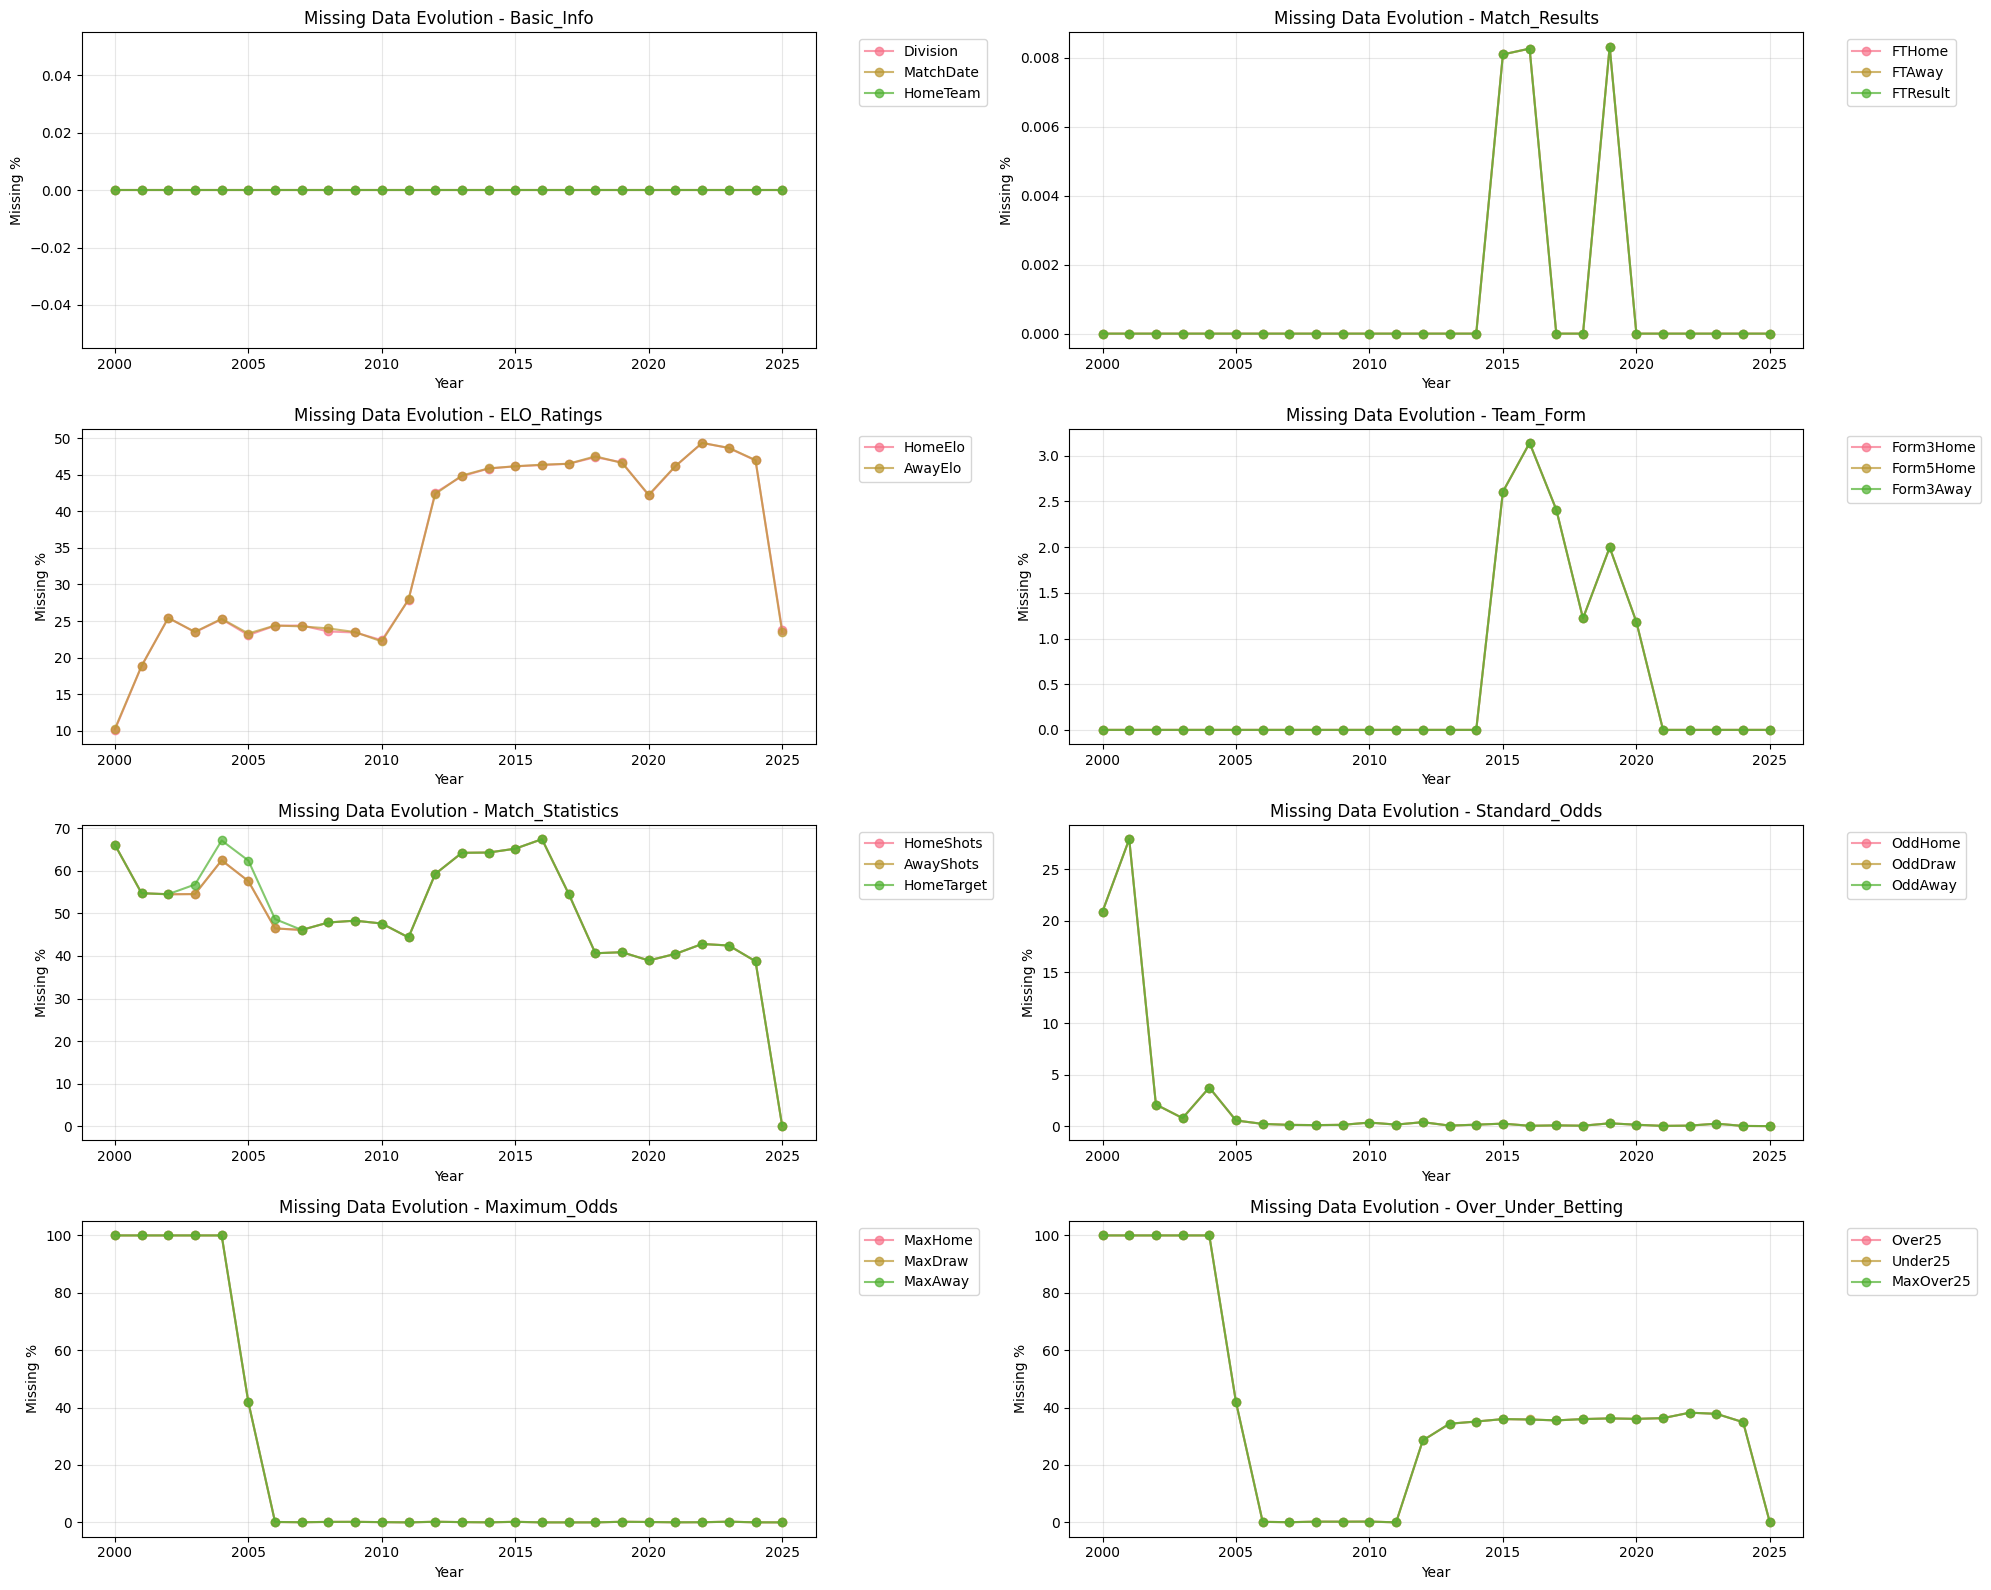

In [ ]:
print("=== MISSING DATA EVOLUTION VISUALIZATIONS ===")

fig, axes = plt.subplots(4, 2, figsize=(20, 16))
axes = axes.flatten()

group_names = list(feature_groups.keys())
for i, (group_name, features) in enumerate(feature_groups.items()):
    if i < len(axes):
        ax = axes[i]
        for feature in features[:3]:  # Show top 3 features per group to avoid clutter
            if feature in missing_by_year_df_full.columns:
                ax.plot(missing_by_year_df_full['Year'], missing_by_year_df_full[feature],
                       marker='o', label=feature, alpha=0.7)

        ax.set_title(f'Missing Data Evolution - {group_name}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Missing %')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Comprehensive missing data by league for ALL features
print(f"\nComprehensive Missing Data by Division/League:")
missing_by_league_full = []
top_leagues = df['Division'].value_counts().head(20).index  # Top 20 leagues

for division in top_leagues:
    league_data = df[df['Division'] == division]
    league_missing = {
        'Division': division,
        'Matches': len(league_data)
    }

    # Add missing percentages for all feature groups
    for group_name, features in feature_groups.items():
        group_missing_avg = []
        for feature in features:
            if feature in df.columns:
                missing_pct = (league_data[feature].isnull().sum() / len(league_data)) * 100
                group_missing_avg.append(missing_pct)

        if group_missing_avg:
            league_missing[f'{group_name}_Missing'] = np.mean(group_missing_avg)

    missing_by_league_full.append(league_missing)

missing_by_league_df_full = pd.DataFrame(missing_by_league_full)
display(missing_by_league_df_full)

# Show missing data for ALL years (not just first 10)
key_display_cols = [
    'Year',
    'FTHome', 'FTAway',
    'HomeElo', 'AwayElo',
    'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away',
    'OddHome', 'OddDraw', 'OddAway',
    'HomeShots', 'AwayShots',
    'HomeTarget', 'AwayTarget',
    'HomeFouls', 'AwayFouls',
    'HomeCorners', 'AwayCorners',
    'HomeYellow', 'AwayYellow',
    'HomeRed', 'AwayRed'
]

print(f"\nMissing Data by Year - Complete Timeline:")
print("Showing all years with key features:")
display(missing_by_year_df_full[key_display_cols])

# Show comprehensive missing data by year for ALL feature groups
print(f"\nMissing Data by Year - All Feature Groups (showing all {len(missing_by_year_df_full)} years):")
# Split into chunks for better display
chunk_size = 5
for i in range(0, len(missing_by_year_df_full), chunk_size):
    chunk = missing_by_year_df_full.iloc[i:i+chunk_size]
    print(f"\nYears {chunk['Year'].min()} - {chunk['Year'].max()}:")
    display(chunk)

# Create a summary table showing data evolution over ALL years
print(f"\n=== YEARLY DATA EVOLUTION SUMMARY (All {df['Year'].nunique()} years) ===")
yearly_summary = []
for year in sorted(df['Year'].unique()):
    year_data = df[df['Year'] == year]
    summary = {
        'Year': year,
        'Total_Matches': len(year_data),
        'Leagues_Count': year_data['Division'].nunique(),
        'Teams_Count': len(set(year_data['HomeTeam'].unique()) | set(year_data['AwayTeam'].unique()))
    }

    # Add data availability summary for each feature group
    for group_name, features in feature_groups.items():
        available_features = []
        for feature in features:
            if feature in df.columns:
                available_pct = ((~year_data[feature].isnull()).sum() / len(year_data)) * 100
                available_features.append(available_pct)

        if available_features:
            summary[f'{group_name}_Avg'] = np.mean(available_features)

    yearly_summary.append(summary)

yearly_summary_df = pd.DataFrame(yearly_summary)
print("Complete yearly evolution:")
display(yearly_summary_df)



Comprehensive Missing Data by Division/League:


,Division,Matches,Basic_Info_Missing,Match_Results_Missing,ELO_Ratings_Missing,Team_Form_Missing,Match_Statistics_Missing,Standard_Odds_Missing,Maximum_Odds_Missing,Over_Under_Betting_Missing,Handicap_Betting_Missing
0,E1,13462,15.296390,0.003714,0.991680,0.0,0.007428,1.247957,19.075917,19.083346,12.231962
1,E2,13055,15.416316,0.000000,87.732669,0.0,0.006383,1.631559,17.901187,17.901187,13.989531
2,E3,12613,15.192262,0.000000,100.000000,0.0,0.018499,1.331959,14.738762,14.738762,10.309469
3,SP2,10342,14.939083,0.106362,3.239219,0.0,65.964030,3.606652,17.066331,17.085670,12.218784
4,I2,9811,15.576394,0.020385,0.219142,0.0,69.709170,3.241260,13.393130,13.556212,10.372711
5,E0,9300,15.333333,0.000000,0.010753,0.0,0.000000,0.892473,19.462366,19.462366,12.440860
6,I1,8891,15.143403,0.011247,0.000000,0.0,15.983391,1.338432,15.903723,15.926218,10.988640
7,SP1,8878,15.156567,0.000000,0.000000,0.0,20.139671,1.013742,20.139671,20.150935,13.261245
8,F1,8657,15.538870,0.005776,0.219476,0.0,18.455200,1.004967,16.241192,16.241192,9.522159
9,F2,8587,15.309188,0.023291,1.112146,0.0,67.718644,4.332130,15.080936,15.080936,10.973953



Missing Data by Year - Complete Timeline:
Showing all years with key features:


,Year,FTHome,FTAway,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,OddHome,OddDraw,OddAway,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
0,2000,0.000000,0.000000,10.128848,10.272011,0.000000,0.000000,0.000000,0.000000,20.901933,20.901933,20.901933,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,60.486757,60.486757,60.486757,60.486757
1,2001,0.000000,0.000000,18.865540,18.865540,0.000000,0.000000,0.000000,0.000000,27.950703,27.950703,27.950703,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.621583,54.621583,54.621583,54.621583
2,2002,0.000000,0.000000,25.449538,25.417139,0.000000,0.000000,0.000000,0.000000,2.105945,2.105945,2.105945,54.527782,54.479184,54.527782,54.479184,54.479184,54.479184,54.479184,54.479184,54.414385,54.414385,54.414385,54.414385
3,2003,0.000000,0.000000,23.468616,23.519032,0.000000,0.000000,0.000000,0.000000,0.781447,0.781447,0.781447,54.550038,54.550038,56.793547,56.793547,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038
4,2004,0.000000,0.000000,25.243947,25.298157,0.000000,0.000000,0.000000,0.000000,3.758583,3.758583,3.758583,62.486447,62.486447,67.148536,67.148536,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447
5,2005,0.000000,0.000000,23.075710,23.296530,0.000000,0.000000,0.000000,0.000000,0.552050,0.552050,0.552050,57.602524,57.602524,62.429022,62.429022,60.536278,60.536278,60.536278,60.536278,57.381703,57.381703,57.381703,57.381703
6,2006,0.000000,0.000000,24.356948,24.385688,0.000000,0.000000,0.000000,0.000000,0.215548,0.215548,0.215548,46.472194,46.472194,48.670786,48.670786,51.904009,51.904009,49.188102,49.188102,46.457824,46.457824,46.457824,46.457824
7,2007,0.000000,0.000000,24.388762,24.267274,0.000000,0.000000,0.000000,0.000000,0.121488,0.121488,0.121488,46.119970,46.119970,46.119970,46.119970,49.020501,49.020501,46.119970,46.119970,46.119970,46.119970,46.119970,46.119970
8,2008,0.000000,0.000000,23.573027,23.992725,0.000000,0.000000,0.000000,0.000000,0.097929,0.097929,0.097929,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531
9,2009,0.000000,0.000000,23.433513,23.490218,0.000000,0.000000,0.000000,0.000000,0.127587,0.127587,0.127587,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838



Missing Data by Year - All Feature Groups (showing all 26 years):

Years 2000 - 2004:


,Year,Matches,Division,MatchDate,HomeTeam,AwayTeam,MatchTime,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
0,2000,2794,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.035791,0.035791,0.035791,10.128848,10.272011,0.0,0.0,0.0,0.0,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,66.141732,60.486757,60.486757,60.486757,60.486757,20.901933,20.901933,20.901933,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000
1,2001,6329,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,18.865540,18.865540,0.0,0.0,0.0,0.0,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.747985,54.621583,54.621583,54.621583,54.621583,27.950703,27.950703,27.950703,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000
2,2002,6173,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.016200,0.016200,0.016200,25.449538,25.417139,0.0,0.0,0.0,0.0,54.527782,54.479184,54.527782,54.479184,54.479184,54.479184,54.479184,54.479184,54.414385,54.414385,54.414385,54.414385,2.105945,2.105945,2.105945,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000
3,2003,3967,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.025208,0.025208,0.025208,23.468616,23.519032,0.0,0.0,0.0,0.0,54.550038,54.550038,56.793547,56.793547,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038,54.550038,0.781447,0.781447,0.781447,100.0,100.0,100.0,100.0,100.0,100.0,100.0,65.944038,65.414671,65.944038
4,2004,5534,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,25.243947,25.298157,0.0,0.0,0.0,0.0,62.486447,62.486447,67.148536,67.148536,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447,62.486447,3.758583,3.758583,3.758583,100.0,100.0,100.0,100.0,100.0,100.0,100.0,10.823997,10.787857,10.787857



Years 2005 - 2009:


,Year,Matches,Division,MatchDate,HomeTeam,AwayTeam,MatchTime,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
5,2005,6340,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.015773,0.015773,0.015773,23.075710,23.296530,0.0,0.0,0.0,0.0,57.602524,57.602524,62.429022,62.429022,60.536278,60.536278,60.536278,60.536278,57.381703,57.381703,57.381703,57.381703,0.552050,0.552050,0.552050,41.876972,41.876972,41.876972,41.924290,41.924290,41.924290,41.924290,5.725552,5.725552,5.725552
6,2006,6959,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.014370,0.014370,0.014370,24.356948,24.385688,0.0,0.0,0.0,0.0,46.472194,46.472194,48.670786,48.670786,51.904009,51.904009,49.188102,49.188102,46.457824,46.457824,46.457824,46.457824,0.215548,0.215548,0.215548,0.143699,0.143699,0.143699,0.186808,0.186808,0.186808,0.186808,0.344877,0.344877,0.359247
7,2007,6585,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.030372,0.030372,0.030372,24.388762,24.267274,0.0,0.0,0.0,0.0,46.119970,46.119970,46.119970,46.119970,49.020501,49.020501,46.119970,46.119970,46.119970,46.119970,46.119970,46.119970,0.121488,0.121488,0.121488,0.045558,0.045558,0.045558,0.060744,0.060744,0.060744,0.060744,0.151860,0.151860,0.151860
8,2008,7148,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,23.573027,23.992725,0.0,0.0,0.0,0.0,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,47.873531,0.097929,0.097929,0.097929,0.167879,0.167879,0.167879,0.251819,0.251819,0.251819,0.251819,0.293788,0.293788,0.293788
9,2009,7054,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,23.433513,23.490218,0.0,0.0,0.0,0.0,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,48.298838,0.127587,0.127587,0.127587,0.184293,0.184293,0.184293,0.240998,0.240998,0.240998,0.240998,0.255174,0.255174,0.269351



Years 2010 - 2014:


,Year,Matches,Division,MatchDate,HomeTeam,AwayTeam,MatchTime,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
10,2010,6925,0.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,0.028881,0.028881,0.028881,22.382671,22.209386,0.0,0.0,0.0,0.0,47.624549,47.624549,47.624549,47.624549,47.624549,47.624549,47.624549,47.624549,47.624549,47.624549,47.624549,47.624549,0.346570,0.346570,0.346570,0.086643,0.086643,0.086643,0.274368,0.274368,0.274368,0.274368,0.288809,0.144404,0.144404
11,2011,7410,0.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,0.013495,0.013495,0.013495,27.894737,27.948718,0.0,0.0,0.0,0.0,44.358974,44.358974,44.358974,44.358974,44.385965,44.385965,44.358974,44.358974,44.358974,44.358974,44.358974,44.358974,0.148448,0.148448,0.148448,0.000000,0.000000,0.000000,0.013495,0.013495,0.013495,0.013495,0.040486,0.040486,0.040486
12,2012,10597,0.0,0.0,0.0,0.0,71.737284,0.0,0.0,0.0,28.272152,28.272152,28.272152,42.521468,42.351609,0.0,0.0,0.0,0.0,59.271492,59.271492,59.271492,59.271492,59.271492,59.271492,59.271492,59.271492,59.271492,59.271492,59.271492,59.280929,0.386902,0.386902,0.386902,0.217043,0.217043,0.217043,28.564688,28.564688,28.564688,28.564688,28.630745,28.630745,28.630745
13,2013,11729,0.0,0.0,0.0,0.0,65.785659,0.0,0.0,0.0,34.231392,34.231392,34.231392,44.777901,44.880211,0.0,0.0,0.0,0.0,64.251002,64.251002,64.251002,64.251002,64.251002,64.251002,64.251002,64.251002,64.251002,64.251002,64.251002,64.251002,0.051155,0.051155,0.051155,0.093785,0.093785,0.093785,34.376332,34.376332,34.376332,34.376332,35.996249,35.996249,35.996249
14,2014,11993,0.0,0.0,0.0,0.0,64.937880,0.0,0.0,0.0,35.078796,35.078796,35.078796,45.835070,45.860085,0.0,0.0,0.0,0.0,64.312516,64.312516,64.312516,64.312516,64.312516,64.312516,64.312516,64.312516,64.312516,64.312516,64.312516,64.312516,0.141749,0.141749,0.141749,0.016676,0.016676,0.016676,35.145502,35.145502,35.145502,35.145502,35.145502,35.145502,35.145502



Years 2015 - 2019:


,Year,Matches,Division,MatchDate,HomeTeam,AwayTeam,MatchTime,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
15,2015,12352,0.0,0.0,0.0,0.0,64.200130,0.008096,0.008096,0.008096,35.986075,35.986075,35.986075,46.138277,46.146373,2.606865,2.606865,2.606865,2.606865,65.220207,65.220207,65.220207,65.220207,65.220207,65.220207,65.220207,65.220207,65.228303,65.220207,65.220207,65.220207,0.242876,0.242876,0.242876,0.194301,0.194301,0.194301,35.994171,35.994171,35.994171,35.994171,36.034650,36.034650,36.034650
16,2016,12100,0.0,0.0,0.0,0.0,64.148760,0.008264,0.008264,0.008264,35.859504,35.859504,35.859504,46.305785,46.363636,3.140496,3.140496,3.140496,3.140496,67.454545,67.454545,67.454545,67.454545,67.454545,67.454545,67.454545,67.454545,64.917355,64.917355,64.917355,64.917355,0.033058,0.033058,0.033058,0.000000,0.000000,0.000000,35.851240,35.859504,35.851240,35.859504,35.851240,35.851240,35.851240
17,2017,12364,0.0,0.0,0.0,0.0,64.461339,0.000000,0.000000,0.000000,35.546749,35.546749,35.546749,46.489809,46.489809,2.410223,2.410223,2.410223,2.410223,54.610159,54.610159,54.610159,54.610159,54.626335,54.626335,54.610159,54.610159,50.088968,50.088968,50.088968,50.088968,0.072792,0.072792,0.072792,0.000000,0.000000,0.000000,35.538661,35.538661,35.538661,35.538661,35.538661,35.538661,35.538661
18,2018,12042,0.0,0.0,0.0,0.0,64.000997,0.000000,0.000000,0.000000,36.023916,36.023916,36.023916,47.384155,47.508719,1.220727,1.220727,1.220727,1.220727,40.641090,40.641090,40.641090,40.641090,40.674307,40.674307,40.641090,40.641090,36.023916,36.023916,36.023916,36.032221,0.041521,0.041521,0.041521,0.000000,0.000000,0.000000,35.999003,35.999003,35.999003,35.999003,35.999003,35.999003,35.999003
19,2019,12018,0.0,0.0,0.0,0.0,31.552671,0.008321,0.008321,0.008321,36.204027,36.204027,36.204027,46.679980,46.596772,1.997004,1.997004,1.997004,1.997004,40.880346,40.880346,40.880346,40.880346,40.880346,40.880346,40.880346,40.880346,36.212348,36.212348,36.212348,36.212348,0.274588,0.274588,0.274588,0.208021,0.208021,0.208021,36.228990,36.228990,36.228990,36.228990,36.228990,36.420369,36.420369



Years 2020 - 2024:


,Year,Matches,Division,MatchDate,HomeTeam,AwayTeam,MatchTime,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
20,2020,9562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.996653,35.996653,35.996653,42.156453,42.250575,1.181761,1.181761,1.181761,1.181761,38.945827,38.945827,38.945827,38.945827,38.945827,38.945827,38.945827,38.945827,35.996653,35.996653,35.996653,35.996653,0.135955,0.135955,0.135955,0.135955,0.135955,0.135955,36.069860,36.069860,36.069860,36.069860,36.080318,36.906505,36.906505
21,2021,13127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.306848,36.306848,36.306848,46.149158,46.179630,0.000000,0.000000,0.000000,0.000000,40.489068,40.489068,40.489068,40.489068,40.489068,40.489068,40.489068,40.489068,36.306848,36.306848,36.306848,36.306848,0.022854,0.022854,0.022854,0.022854,0.022854,0.022854,36.329702,36.329702,36.329702,36.329702,36.329702,37.030548,37.038166
22,2022,12168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.256082,38.256082,38.256082,49.334320,49.334320,0.000000,0.000000,0.000000,0.000000,42.817226,42.817226,42.817226,42.817226,42.833662,42.833662,42.817226,42.817226,38.256082,38.256082,38.256082,38.256082,0.049310,0.049310,0.049310,0.049310,0.049310,0.049310,38.231427,38.231427,38.231427,38.231427,38.231427,38.551940,38.551940
23,2023,12501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.828974,37.828974,37.828974,48.636109,48.660107,0.000000,0.000000,0.000000,0.000000,42.460603,42.460603,42.460603,42.460603,42.460603,42.460603,42.460603,42.460603,37.828974,37.828974,37.828974,37.828974,0.239981,0.239981,0.239981,0.239981,0.239981,0.239981,37.828974,37.828974,37.828974,37.828974,37.972962,38.172946,38.172946
24,2024,11148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.912092,34.912092,34.912092,46.941155,46.986006,0.000000,0.000000,0.000000,0.000000,38.751346,38.751346,38.751346,38.751346,38.751346,38.751346,38.751346,38.751346,34.912092,34.912092,34.912092,34.912092,0.017940,0.017940,0.017940,0.017940,0.017940,0.017940,34.912092,34.912092,34.912092,34.912092,34.921062,35.136347,35.136347



Years 2025 - 2025:


,Year,Matches,Division,MatchDate,HomeTeam,AwayTeam,MatchTime,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
25,2025,1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.731139,23.45679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.274348,0.274348



=== YEARLY DATA EVOLUTION SUMMARY (All 26 years) ===
Complete yearly evolution:


,Year,Total_Matches,Leagues_Count,Teams_Count,Basic_Info_Avg,Match_Results_Avg,ELO_Ratings_Avg,Team_Form_Avg,Match_Statistics_Avg,Standard_Odds_Avg,Maximum_Odds_Avg,Over_Under_Betting_Avg,Handicap_Betting_Avg
0,2000,2794,15,294,80.000000,99.982105,89.799571,100.000000,35.743259,79.098067,0.000000,0.000000,0.000000
1,2001,6329,20,385,80.000000,100.000000,81.134460,100.000000,45.294149,72.049297,0.000000,0.000000,0.000000
2,2002,6173,20,390,80.000000,99.991900,74.566661,100.000000,45.534316,97.894055,0.000000,0.000000,0.000000
3,2003,3967,20,388,80.000000,99.987396,76.506176,100.000000,45.076044,99.218553,0.000000,0.000000,34.232417
4,2004,5534,20,388,80.000000,100.000000,74.728948,100.000000,36.736538,96.241417,0.000000,0.000000,89.200096
5,2005,6340,21,408,80.000000,99.992114,76.813880,100.000000,40.688749,99.447950,58.123028,58.075710,94.274448
6,2006,6959,21,405,80.000000,99.992815,75.628682,100.000000,51.808210,99.784452,99.856301,99.813192,99.650333
7,2007,6585,21,406,80.000000,99.984814,75.671982,100.000000,53.396608,99.878512,99.954442,99.939256,99.848140
8,2008,7148,21,412,80.000000,100.000000,76.217124,100.000000,52.126469,99.902071,99.832121,99.748181,99.706212
9,2009,7054,21,405,80.000000,100.000000,76.538134,100.000000,51.701162,99.872413,99.815707,99.759002,99.740100


In [ ]:
for col in ['HomeElo', 'AwayElo']:
    print(f"\n=== {col} missing % by Division ===")
    display(df.groupby("Division")[col].apply(lambda x: x.isna().mean() * 100).sort_values(ascending=False))



=== HomeElo missing % by Division ===


,HomeElo
Division,
ARG,100.000000
BRA,100.000000
CHN,100.000000
MEX,100.000000
E3,100.000000
EC,100.000000
IRL,100.000000
SC2,100.000000
USA,100.000000



=== AwayElo missing % by Division ===


,AwayElo
Division,
ARG,100.000000
BRA,100.000000
CHN,100.000000
MEX,100.000000
E3,100.000000
EC,100.000000
IRL,100.000000
SC2,100.000000
USA,100.000000


In [ ]:
print(df['Division'].unique())

['F1' 'F2' 'D1' 'D2' 'T1' 'B1' 'E2' 'E1' 'N1' 'P1' 'E0' 'I2' 'SP2' 'SP1'
 'I1' 'E3' 'SC0' 'SC1' 'SC2' 'SC3' 'G1' 'EC' 'USA' 'SWE' 'NOR' 'IRL' 'BRA'
 'ARG' 'MEX' 'JAP' 'RUS' 'POL' 'DEN' 'ROM' 'AUT' 'SUI' 'FIN' 'CHN']


In [ ]:
# Cell 14: Feature importance categorization and strategy
print("=== FEATURE CATEGORIZATION & STRATEGY ===")

# Categorize features by importance and completeness
feature_categories = {
    'Essential': {
        'features': ['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway', 'FTResult'],
        'strategy': 'Keep all - required for modeling',
        'missing_threshold': 1.0  # Less than 1% missing acceptable
    },
    'High_Value': {
        'features': ['HomeElo', 'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'OddHome', 'OddDraw', 'OddAway'],
        'strategy': 'Impute or create missing indicators',
        'missing_threshold': 40.0  # Up to 40% missing acceptable with treatment
    },
    'Medium_Value': {
        'features': ['HTHome', 'HTAway', 'HTResult', 'MaxHome', 'MaxDraw', 'MaxAway'],
        'strategy': 'Consider for specific models',
        'missing_threshold': 25.0
    },
    'Supplementary': {
        'features': ['HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
                    'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed'],
        'strategy': 'Use when available, create availability indicators',
        'missing_threshold': 60.0
    },
    'Optional': {
        'features': ['MatchTime', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize', 'HandiHome', 'HandiAway'],
        'strategy': 'Consider dropping or use for specific analysis',
        'missing_threshold': 70.0
    }
}

# Analyze each category
for category, info in feature_categories.items():
    print(f"\n=== {category.upper()} FEATURES ===")
    print(f"Strategy: {info['strategy']}")

    category_analysis = []
    for feature in info['features']:
        if feature in df.columns:
            missing_pct = (df[feature].isnull().sum() / len(df)) * 100
            status = " Good" if missing_pct <= info['missing_threshold'] else " Needs attention"
            category_analysis.append({
                'Feature': feature,
                'Missing_%': missing_pct,
                'Missing_Count': df[feature].isnull().sum(),
                'Status': status
            })

    if category_analysis:
        cat_df = pd.DataFrame(category_analysis).sort_values('Missing_%')
        display(cat_df)

=== FEATURE CATEGORIZATION & STRATEGY ===

=== ESSENTIAL FEATURES ===
Strategy: Keep all - required for modeling


,Feature,Missing_%,Missing_Count,Status
0,Division,0.000000,0,Good
1,MatchDate,0.000000,0,Good
2,HomeTeam,0.000000,0,Good
3,AwayTeam,0.000000,0,Good
4,FTHome,0.001314,3,Good
5,FTAway,0.001314,3,Good
6,FTResult,0.001314,3,Good



=== HIGH_VALUE FEATURES ===
Strategy: Impute or create missing indicators


,Feature,Missing_%,Missing_Count,Status
3,Form5Home,0.656809,1500,Good
2,Form3Home,0.656809,1500,Good
5,Form5Away,0.656809,1500,Good
4,Form3Away,0.656809,1500,Good
6,OddHome,1.326754,3030,Good
7,OddDraw,1.326754,3030,Good
8,OddAway,1.326754,3030,Good
0,HomeElo,38.737263,88467,Good
1,AwayElo,38.767039,88535,Good



=== MEDIUM_VALUE FEATURES ===
Strategy: Consider for specific models


,Feature,Missing_%,Missing_Count,Status
3,MaxHome,12.100606,27635,Good
4,MaxDraw,12.100606,27635,Good
5,MaxAway,12.100606,27635,Good
0,HTHome,23.899079,54580,Good
2,HTResult,23.899079,54580,Good
1,HTAway,23.899079,54580,Good



=== SUPPLEMENTARY FEATURES ===
Strategy: Use when available, create availability indicators


,Feature,Missing_%,Missing_Count,Status
10,HomeRed,48.716815,111258,Good
9,AwayYellow,48.716815,111258,Good
8,HomeYellow,48.717253,111259,Good
11,AwayRed,48.717690,111260,Good
1,AwayShots,50.713951,115819,Good
0,HomeShots,50.715265,115822,Good
6,HomeCorners,50.878153,116194,Good
7,AwayCorners,50.878153,116194,Good
4,HomeFouls,51.048923,116584,Good
5,AwayFouls,51.048923,116584,Good



=== OPTIONAL FEATURES ===
Strategy: Consider dropping or use for specific analysis


,Feature,Missing_%,Missing_Count,Status
5,HandiSize,32.325497,73824,Good
6,HandiHome,32.436279,74077,Good
7,HandiAway,32.446788,74101,Good
1,Over25,35.975164,82159,Good
3,MaxOver25,35.975164,82159,Good
2,Under25,35.975602,82160,Good
4,MaxUnder25,35.975602,82160,Good
0,MatchTime,57.573661,131485,Good


In [ ]:
# Cell 15: Data availability timeline and league coverage
print("=== DATA AVAILABILITY ANALYSIS ===")

# Analyze ALL features availability
print("Data availability by year (% of matches with complete data for ALL feature groups):")
availability_by_year_full = []
for year in sorted(df['Year'].unique()):
    year_data = df[df['Year'] == year]
    year_info = {'Year': year, 'Total_Matches': len(year_data)}

    # Calculate availability for each feature group
    for group_name, features in feature_groups.items():
        available_features = []
        for feature in features:
            if feature in df.columns:
                available_pct = ((~year_data[feature].isnull()).sum() / len(year_data)) * 100
                available_features.append(available_pct)

        if available_features:
            year_info[f'{group_name}_Avg_Available'] = np.mean(available_features)

    availability_by_year_full.append(year_info)

availability_df_full = pd.DataFrame(availability_by_year_full)
display(availability_df_full.head(26))



=== DATA AVAILABILITY ANALYSIS ===
Data availability by year (% of matches with complete data for ALL feature groups):


,Year,Total_Matches,Basic_Info_Avg_Available,Match_Results_Avg_Available,ELO_Ratings_Avg_Available,Team_Form_Avg_Available,Match_Statistics_Avg_Available,Standard_Odds_Avg_Available,Maximum_Odds_Avg_Available,Over_Under_Betting_Avg_Available,Handicap_Betting_Avg_Available
0,2000,2794,80.000000,99.982105,89.799571,100.000000,35.743259,79.098067,0.000000,0.000000,0.000000
1,2001,6329,80.000000,100.000000,81.134460,100.000000,45.294149,72.049297,0.000000,0.000000,0.000000
2,2002,6173,80.000000,99.991900,74.566661,100.000000,45.534316,97.894055,0.000000,0.000000,0.000000
3,2003,3967,80.000000,99.987396,76.506176,100.000000,45.076044,99.218553,0.000000,0.000000,34.232417
4,2004,5534,80.000000,100.000000,74.728948,100.000000,36.736538,96.241417,0.000000,0.000000,89.200096
5,2005,6340,80.000000,99.992114,76.813880,100.000000,40.688749,99.447950,58.123028,58.075710,94.274448
6,2006,6959,80.000000,99.992815,75.628682,100.000000,51.808210,99.784452,99.856301,99.813192,99.650333
7,2007,6585,80.000000,99.984814,75.671982,100.000000,53.396608,99.878512,99.954442,99.939256,99.848140
8,2008,7148,80.000000,100.000000,76.217124,100.000000,52.126469,99.902071,99.832121,99.748181,99.706212
9,2009,7054,80.000000,100.000000,76.538134,100.000000,51.701162,99.872413,99.815707,99.759002,99.740100


In [ ]:
# Comprehensive league quality assessment
print(f"\nComprehensive League Data Quality Assessment:")
league_quality_full = []
top_leagues = df['Division'].value_counts().head(25)

for league in top_leagues.index:
    league_data = df[df['Division'] == league]

    quality_scores = {'League': league, 'Matches': len(league_data)}

    # Calculate completeness scores for each feature group
    group_scores = []
    for group_name, features in feature_groups.items():
        group_completeness = []
        for feature in features:
            if feature in df.columns:
                completeness = (~league_data[feature].isnull()).mean() * 100
                group_completeness.append(completeness)

        if group_completeness:
            avg_completeness = np.mean(group_completeness)
            quality_scores[f'{group_name}_Quality'] = avg_completeness
            group_scores.append(avg_completeness)

    # Overall quality score
    if group_scores:
        overall_score = np.mean(group_scores)
        quality_scores['Overall_Quality'] = overall_score
        quality_scores['Quality_Grade'] = (
            'A+' if overall_score >= 95 else
            'A' if overall_score >= 85 else
            'B+' if overall_score >= 75 else
            'B' if overall_score >= 65 else
            'C+' if overall_score >= 55 else
            'C' if overall_score >= 45 else
            'D' if overall_score >= 35 else 'F'
        )

    league_quality_full.append(quality_scores)

league_quality_df_full = pd.DataFrame(league_quality_full).sort_values('Overall_Quality', ascending=False)
display(league_quality_df_full)



Comprehensive League Data Quality Assessment:


,League,Matches,Basic_Info_Quality,Match_Results_Quality,ELO_Ratings_Quality,Team_Form_Quality,Match_Statistics_Quality,Standard_Odds_Quality,Maximum_Odds_Quality,Over_Under_Betting_Quality,Handicap_Betting_Quality,Overall_Quality,Quality_Grade
19,SC0,5064,84.861769,100.000000,95.665482,100.000000,99.986835,98.874408,87.243286,87.243286,90.705635,93.842300,A
5,E0,9300,84.666667,100.000000,99.989247,100.000000,100.000000,99.107527,80.537634,80.537634,87.559140,92.488650,A
0,E1,13462,84.703610,99.996286,99.008320,100.000000,99.992572,98.752043,80.924083,80.916654,87.768038,92.451290,A
10,D1,7423,84.680048,100.000000,100.000000,100.000000,94.283533,98.989627,81.112758,81.112758,87.498316,91.964116,A
6,I1,8891,84.856597,99.988753,100.000000,100.000000,84.016609,98.661568,84.096277,84.073782,89.011360,91.633883,A
8,F1,8657,84.461130,99.994224,99.780524,100.000000,81.544800,98.995033,83.758808,83.758808,90.477841,91.419019,A
7,SP1,8878,84.843433,100.000000,100.000000,100.000000,79.860329,98.986258,79.860329,79.849065,86.738755,90.015352,A
23,G1,4063,83.992124,99.643121,95.926655,87.693822,31.696612,97.834113,99.237017,98.818607,96.759373,87.955716,A
14,D2,7062,84.919286,100.000000,99.483149,100.000000,44.694610,98.782215,85.202492,85.202492,88.903049,87.465255,A
4,I2,9811,84.423606,99.979615,99.780858,100.000000,30.290830,96.758740,86.606870,86.443788,89.627289,85.990177,A


PreProcessing Steps


=== OVERALL FEATURE COMPLETENESS SUMMARY ===


,Feature,Non_Null_Count,Total_Records,Completeness_%,Missing_Count,Data_Quality
0,Division,228377,228377,100.000000,0,Excellent
1,MatchDate,228377,228377,100.000000,0,Excellent
2,HomeTeam,228377,228377,100.000000,0,Excellent
3,AwayTeam,228377,228377,100.000000,0,Excellent
5,FTHome,228374,228377,99.998686,3,Excellent
6,FTAway,228374,228377,99.998686,3,Excellent
7,FTResult,228374,228377,99.998686,3,Excellent
15,Form3Away,226877,228377,99.343191,1500,Excellent
16,Form5Away,226877,228377,99.343191,1500,Excellent
13,Form3Home,226877,228377,99.343191,1500,Excellent


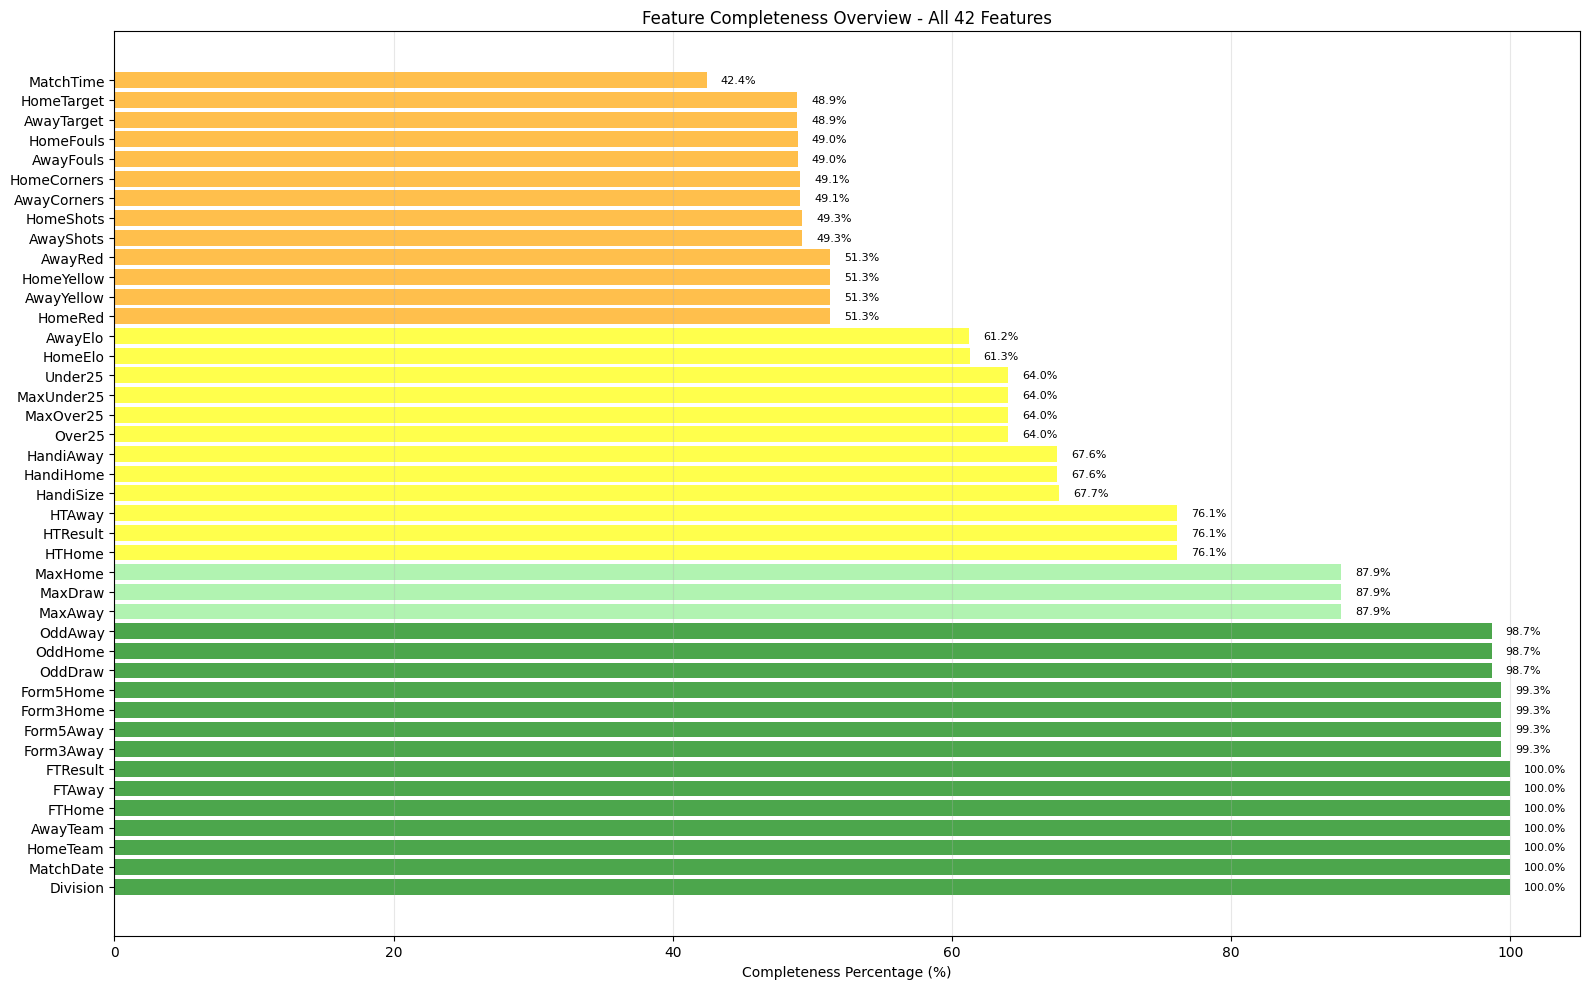

=== ANALYSIS COMPLETE ===
Total features analyzed: 42
Feature groups covered: 9
Years of data: 26
Leagues analyzed: 38


In [ ]:
# Feature completeness overview
print(f"\n=== OVERALL FEATURE COMPLETENESS SUMMARY ===")
feature_completeness = []
for feature in all_features:
    if feature in df.columns:
        total_records = len(df)
        non_null = df[feature].count()
        completeness_pct = (non_null / total_records) * 100

        feature_completeness.append({
            'Feature': feature,
            'Non_Null_Count': non_null,
            'Total_Records': total_records,
            'Completeness_%': completeness_pct,
            'Missing_Count': total_records - non_null,
            'Data_Quality': (
                'Excellent' if completeness_pct >= 95 else
                'Good' if completeness_pct >= 80 else
                'Fair' if completeness_pct >= 60 else
                'Poor' if completeness_pct >= 40 else 'Very Poor'
            )
        })

feature_completeness_df = pd.DataFrame(feature_completeness).sort_values('Completeness_%', ascending=False)
display(feature_completeness_df)

# Visualization of overall feature completeness
plt.figure(figsize=(16, 10))
colors = ['green' if x >= 95 else 'lightgreen' if x >= 80 else 'yellow' if x >= 60 else 'orange' if x >= 40 else 'red'
          for x in feature_completeness_df['Completeness_%']]

bars = plt.barh(range(len(feature_completeness_df)), feature_completeness_df['Completeness_%'],
                color=colors, alpha=0.7)
plt.yticks(range(len(feature_completeness_df)), feature_completeness_df['Feature'])
plt.xlabel('Completeness Percentage (%)')
plt.title('Feature Completeness Overview - All 42 Features')
plt.grid(axis='x', alpha=0.3)

# Add percentage labels on bars
for i, (bar, pct) in enumerate(zip(bars, feature_completeness_df['Completeness_%'])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{pct:.1f}%',
             va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("=== ANALYSIS COMPLETE ===")
print(f"Total features analyzed: {len(all_features)}")
print(f"Feature groups covered: {len(feature_groups)}")
print(f"Years of data: {df['Year'].nunique()}")
print(f"Leagues analyzed: {df['Division'].nunique()}")

# ***PreProcessing Steps***

In [ ]:
def assign_season_ids_by_gap(df, gap_days=75):
    df = df.sort_values(['Division', 'MatchDate']).copy()
    df['MatchDate'] = pd.to_datetime(df['MatchDate'], errors='coerce')
    season_counter = {}
    output_frames = []

    for division, group in df.groupby('Division'):
        group = group.sort_values('MatchDate')
        group['DateDiff'] = group['MatchDate'].diff().dt.days.fillna(0)
        group['SeasonFlag'] = (group['DateDiff'] > gap_days).cumsum()

        season_ids = []
        for _, row in group.iterrows():
            season_idx = int(row['SeasonFlag'])
            if division not in season_counter:
                season_counter[division] = {}
            if season_idx not in season_counter[division]:
                start_year = row['MatchDate'].year
                if row['MatchDate'].month >= 6:
                    season_str = f"{start_year}_{start_year + 1}"
                else:
                    season_str = f"{start_year - 1}_{start_year}"
                season_counter[division][season_idx] = f"{division}_{season_str}"
            season_ids.append(season_counter[division][season_idx])

        group['SeasonID'] = season_ids
        output_frames.append(group)

    # Reassemble the DataFrame with SeasonIDs attached
    return pd.concat(output_frames).sort_index()


In [ ]:
from sklearn.impute import SimpleImputer



def preprocess_football_data(df):
    # Step 0: Copy original dataset
    df = df.copy()

    # Step 1: Clean Label and Score Columns
    df = df[df['FTResult'].notna()]
    df = df[df['FTHome'].notna() & df['FTAway'].notna()]
    label_map = {'A': 0, 'D': 1, 'H': 2}
    df['Label'] = df['FTResult'].map(label_map)

    # Step 2: Drop Low-Quality Leagues
    low_quality_leagues = ['ARG', 'USA', 'EC']
    df = df[~df['Division'].isin(low_quality_leagues)]

    # Step 2.1: Drop divisions with 100% missing Elo data
    no_elo_divs = ['BRA', 'E3', 'CHN', 'SC2', 'SUI', 'JAP', 'IRL', 'MEX']
    df = df[~df['Division'].isin(no_elo_divs)]

    print(f"🧹 Dropped divisions with no Elo data: {no_elo_divs}")


    # Step 3: Drop Irrelevant or High-Missing Columns
    columns_to_drop = [
        'MatchTime', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25',
        'HandiSize', 'HandiHome', 'HandiAway',
        'HTHome', 'HTAway', 'HTResult'
    ]
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

    # Step 4: Impute Pre-Match Odds by Division
    odds_cols = ['OddHome', 'OddDraw', 'OddAway']
    for col in odds_cols:
        for div in df['Division'].unique():
            median_val = df.loc[df['Division'] == div, col].median()
            mask = (df['Division'] == div) & (df[col].isnull())
            df.loc[mask, col] = median_val

    # Step 5: Impute Form Columns Globally
    form_cols = ['Form3Home', 'Form5Home', 'Form3Away', 'Form5Away']
    df[form_cols] = df[form_cols].fillna(df[form_cols].median())

    # Step 6: Impute Maximum Odds by Division
    max_odds_cols = ['MaxHome', 'MaxDraw', 'MaxAway']
    for col in max_odds_cols:
        for div in df['Division'].unique():
            median_val = df.loc[df['Division'] == div, col].median()
            mask = (df['Division'] == div) & (df[col].isnull())
            df.loc[mask, col] = median_val

    # Step 7: Temporal Feature Extraction
    df['MatchDate'] = pd.to_datetime(df['MatchDate'], errors='coerce')
    df['Year'] = df['MatchDate'].dt.year
    df['Month'] = df['MatchDate'].dt.month
    df['DayOfWeek'] = df['MatchDate'].dt.dayofweek

     # Step 7.1: Generate realistic SeasonID using match gaps
    df = assign_season_ids_by_gap(df, gap_days=40)

    # Add legacy season flag
    df['IsLegacySeason'] = (df['Year'] < 2006).astype(int)

    # Step 8: Elo Imputation by Division
    for col in ['HomeElo', 'AwayElo']:
        for div in df['Division'].unique():
            median_val = df.loc[df['Division'] == div, col].median()
            mask = (df['Division'] == div) & (df[col].isnull())
            df.loc[mask, col] = median_val

    # Step 9: Availability Flags for Supplementary Features
    supplementary_cols = ['HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget',
                          'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners',
                          'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed']
    for col in supplementary_cols:
        if col in df.columns:
            df[f"{col}_available"] = (~df[col].isnull()).astype(int)

    # Step 10: Final Check for Dataset Integrity
    print(f"Final dataset shape: {df.shape}")
    print("Remaining nulls in top features:")
    display(df.isnull().sum().sort_values(ascending=False).head(10))

    return df

# Example usage:
df_cleaned = preprocess_football_data(df)


🧹 Dropped divisions with no Elo data: ['BRA', 'E3', 'CHN', 'SC2', 'SUI', 'JAP', 'IRL', 'MEX']
Final dataset shape: (173823, 52)
Remaining nulls in top features:


,0
HomeTarget,78883
AwayTarget,78882
HomeFouls,78838
AwayFouls,78838
HomeCorners,78451
AwayCorners,78451
HomeShots,78077
AwayShots,78076
HomeYellow,77891
AwayRed,77891


# **Evaluation for Preprocessed Dataset**

,0
HomeTarget,78883
AwayTarget,78882
AwayFouls,78838
HomeFouls,78838
HomeCorners,78451
AwayCorners,78451
HomeShots,78077
AwayShots,78076
HomeYellow,77891
AwayRed,77891


Shape: (173823, 52)
<class 'pandas.core.frame.DataFrame'>
Index: 173823 entries, 0 to 228376
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Division               173823 non-null  object        
 1   MatchDate              173823 non-null  datetime64[ns]
 2   HomeTeam               173823 non-null  object        
 3   AwayTeam               173823 non-null  object        
 4   HomeElo                173823 non-null  float64       
 5   AwayElo                173823 non-null  float64       
 6   Form3Home              173823 non-null  float64       
 7   Form5Home              173823 non-null  float64       
 8   Form3Away              173823 non-null  float64       
 9   Form5Away              173823 non-null  float64       
 10  FTHome                 173823 non-null  float64       
 11  FTAway                 173823 non-null  float64       
 12  FTResult               173823

,count
Division,
E1,13462
E2,13055
SP2,10342
I2,9811
E0,9300
I1,8891
SP1,8878
F1,8657
F2,8587


Matches per Year:


,count
Year,
2000,2794
2001,5898
2002,5454
2003,3546
2004,4897
2005,5693
2006,6218
2007,5887
2008,6411


<Axes: title={'center': 'OddAway'}>

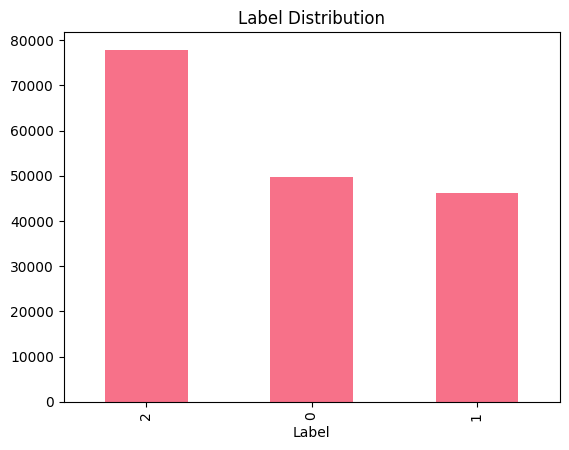

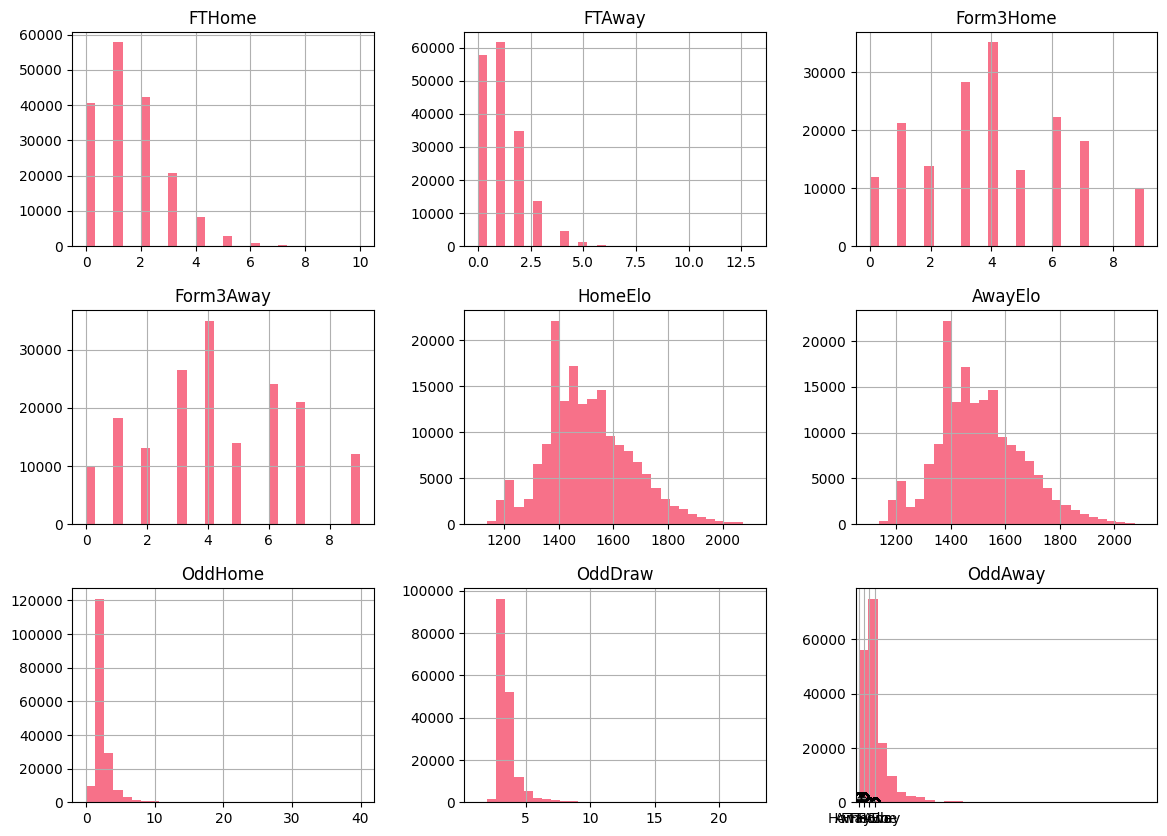

In [ ]:
# 1. Check for Remaining Missing Data
missing_summary = df_cleaned.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
display(missing_summary)

# 2. Dataset Shape and Info
print(f"Shape: {df_cleaned.shape}")
df_cleaned.info()

# 3. Label Distribution
print(df_cleaned['Label'].value_counts(normalize=True))
df_cleaned['Label'].value_counts().plot(kind='bar', title='Label Distribution')

# 4. Important Feature Distributions
important_cols = ['FTHome', 'FTAway', 'Form3Home', 'Form3Away', 'HomeElo', 'AwayElo', 'OddHome', 'OddDraw', 'OddAway']
df_cleaned[important_cols].hist(figsize=(14, 10), bins=30, layout=(3, 3))

# 5. League and Season Coverage
print("Matches per Division:")
display(df_cleaned['Division'].value_counts())

print("Matches per Year:")
display(df_cleaned['Year'].value_counts().sort_index())

# 6. Outlier Check (Optional)
df_cleaned[['HomeElo', 'AwayElo', 'FTHome', 'FTAway']].boxplot(figsize=(12, 6))


In [ ]:
display(df_cleaned.head())

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Year,Month,DayOfWeek,Season,Label,DateDiff,SeasonFlag,SeasonID,IsLegacySeason,HomeShots_available,AwayShots_available,HomeTarget_available,AwayTarget_available,HomeFouls_available,AwayFouls_available,HomeCorners_available,AwayCorners_available,HomeYellow_available,AwayYellow_available,HomeRed_available,AwayRed_available
0,F1,2000-07-28,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,3.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30,2.25,3.46,3.82,2000,7,4,2000/2001,2,0.0,0,F1_2000_2001,1,0,0,0,0,0,0,0,0,0,0,0,0
1,F1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,3.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.40,4.60,2.25,3.46,3.82,2000,7,4,2000/2001,2,0.0,0,F1_2000_2001,1,0,0,0,0,0,0,0,0,0,0,0,0
2,F2,2000-07-28,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,0.0,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.14,3.06,3.58,2.29,3.25,3.83,2000,7,4,2000/2001,0,0.0,0,F2_2000_2001,1,0,0,0,0,0,0,0,0,0,0,0,0
3,F2,2000-07-29,Ajaccio,Le Mans,1470.87,1477.89,0.0,0.0,0.0,0.0,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.14,3.06,3.58,2.29,3.25,3.83,2000,7,5,2000/2001,2,1.0,0,F2_2000_2001,1,0,0,0,0,0,0,0,0,0,0,0,0
4,F2,2000-07-29,Beauvais,Montpellier,1422.21,1606.00,0.0,0.0,0.0,0.0,1.0,3.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.14,3.06,3.58,2.29,3.25,3.83,2000,7,5,2000/2001,0,0.0,0,F2_2000_2001,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("SeasonID in columns:", 'SeasonID' in df_cleaned.columns)
print(df_cleaned[['Division', 'MatchDate', 'SeasonID']].head())


SeasonID in columns: True
  Division  MatchDate      SeasonID
0       F1 2000-07-28  F1_2000_2001
1       F1 2000-07-28  F1_2000_2001
2       F2 2000-07-28  F2_2000_2001
3       F2 2000-07-29  F2_2000_2001
4       F2 2000-07-29  F2_2000_2001



🔎 Missing Values by Column:


,0
HomeTarget,78883
AwayTarget,78882
AwayFouls,78838
HomeFouls,78838
HomeCorners,78451
AwayCorners,78451
HomeShots,78077
AwayShots,78076
HomeYellow,77891
AwayRed,77891



♾️ Inf/Zero Risk Columns:
OddHome    → infs: 0 | zeros: 6
OddDraw    → infs: 0 | zeros: 0
OddAway    → infs: 0 | zeros: 0

📊 Value Ranges (numeric features):
HomeElo              | min:    1103.13 | max:    2107.48
AwayElo              | min:    1103.13 | max:    2107.48
Form3Home            | min:       0.00 | max:       9.00
Form5Home            | min:       0.00 | max:      15.00
Form3Away            | min:       0.00 | max:       9.00
Form5Away            | min:       0.00 | max:      15.00
FTHome               | min:       0.00 | max:      10.00
FTAway               | min:       0.00 | max:      13.00
HomeShots            | min:       0.00 | max:      46.00
AwayShots            | min:       0.00 | max:      45.00
HomeTarget           | min:       0.00 | max:      31.00
AwayTarget           | min:       0.00 | max:      23.00
HomeFouls            | min:       0.00 | max:     145.00
AwayFouls            | min:       0.00 | max:      41.00
HomeCorners          | min:       0.00 | ma

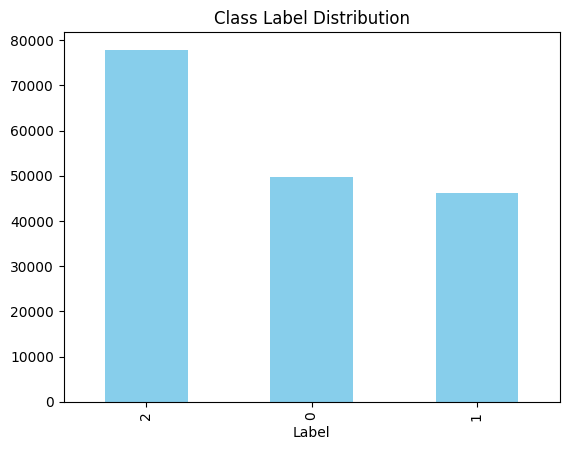

In [ ]:
# 1. Missing Values Summary
print("\n🔎 Missing Values by Column:")
missing_summary = df_cleaned.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
if not missing_summary.empty:
    display(missing_summary.sort_values(ascending=False))
else:
    print("✅ No missing values detected.")

# 2. Inf / Zero Value Risk (for features used in division)
print("\n♾️ Inf/Zero Risk Columns:")
for col in ['OddHome', 'OddDraw', 'OddAway', 'EloTotal']:
    if col in df_cleaned.columns:
        count_inf = (~np.isfinite(df_cleaned[col])).sum()
        count_zero = (df_cleaned[col] == 0).sum()
        print(f"{col:10s} → infs: {count_inf} | zeros: {count_zero}")

# 3. Feature Ranges (optional: filter by numeric only)
print("\n📊 Value Ranges (numeric features):")
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print(f"{col:20s} | min: {df_cleaned[col].min():10.2f} | max: {df_cleaned[col].max():10.2f}")

# 4. Class Distribution
if 'Label' in df_cleaned.columns:
    print("\n🎯 Class Distribution (Label):")
    print(df_cleaned['Label'].value_counts())
    df_cleaned['Label'].value_counts().plot(kind='bar', title='Class Label Distribution', color='skyblue')

In [ ]:
# Odds columns in preprocessed data
odds_cols = ['OddHome', 'OddDraw', 'OddAway']

for col in odds_cols:
    print(f"\n=== {col} missing % by Division ===")
    display(df_cleaned.groupby("Division")[col].apply(lambda x: x.isna().mean() * 100).sort_values(ascending=False))



=== OddHome missing % by Division ===


,OddHome
Division,
AUT,0.0
B1,0.0
D1,0.0
D2,0.0
DEN,0.0
E0,0.0
E1,0.0
E2,0.0
F1,0.0



=== OddDraw missing % by Division ===


,OddDraw
Division,
AUT,0.0
B1,0.0
D1,0.0
D2,0.0
DEN,0.0
E0,0.0
E1,0.0
E2,0.0
F1,0.0



=== OddAway missing % by Division ===


,OddAway
Division,
AUT,0.0
B1,0.0
D1,0.0
D2,0.0
DEN,0.0
E0,0.0
E1,0.0
E2,0.0
F1,0.0


# ***Feature Engineering ***

# ***Form3-From5 features***

In [ ]:
from collections import defaultdict, deque

def calculate_team_form_features_venue_only(df):
    df = df.sort_values(by='MatchDate').copy()

    # Prepare venue-specific form columns
    df['Form3Home_calc'] = 0
    df['Form5Home_calc'] = 0
    df['Form3Away_calc'] = 0
    df['Form5Away_calc'] = 0

    # Result-to-points mapping
    result_to_points = {'H': 3, 'D': 1, 'A': 0}

    # Season-wise reset
    for season_id, season_df in df.groupby('SeasonID'):
        home_form = defaultdict(lambda: deque(maxlen=5))
        away_form = defaultdict(lambda: deque(maxlen=5))

        season_df_sorted = season_df.sort_values(by='MatchDate')

        for idx, row in season_df_sorted.iterrows():
            home, away, result = row['HomeTeam'], row['AwayTeam'], row['FTResult']

            # Fetch history
            home_last = list(home_form[home])
            away_last = list(away_form[away])

            # Assign form features
            df.at[idx, 'Form3Home_calc'] = sum(home_last[-3:])
            df.at[idx, 'Form5Home_calc'] = sum(home_last)
            df.at[idx, 'Form3Away_calc'] = sum(away_last[-3:])
            df.at[idx, 'Form5Away_calc'] = sum(away_last)

            # Update form trackers
            if result == 'H':
                home_form[home].append(3)
                away_form[away].append(0)
            elif result == 'A':
                home_form[home].append(0)
                away_form[away].append(3)
            elif result == 'D':
                home_form[home].append(1)
                away_form[away].append(1)

    return df


In [ ]:
def validate_split_form_features(df, team_name="Paris SG"):
    cols = [
        'SeasonID', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTResult',
        'Form3Home_calc', 'Form5Home_calc',
        'Form3Away_calc', 'Form5Away_calc'
    ]
    sample = df[(df['HomeTeam'] == team_name) | (df['AwayTeam'] == team_name)]
    sample = sample.sort_values(by='MatchDate')

    print(f"Split venue-specific form for {team_name}:")
    print(sample[cols].to_string(index=False))


In [ ]:
df_features = calculate_team_form_features_venue_only(df_cleaned)
validate_split_form_features(df_features, team_name="Paris SG")


Split venue-specific form for Paris SG:
    SeasonID  MatchDate              HomeTeam              AwayTeam FTResult  Form3Home_calc  Form5Home_calc  Form3Away_calc  Form5Away_calc
F1_2000_2001 2000-07-28              Paris SG            Strasbourg        H               0               0               0               0
F1_2000_2001 2000-08-05                Rennes              Paris SG        D               0               0               0               0
F1_2000_2001 2000-08-13              Paris SG                 Sedan        H               3               3               3               3
F1_2000_2001 2000-08-19                  Metz              Paris SG        H               0               0               1               1
F1_2000_2001 2000-08-27              Paris SG                Bastia        H               6               6               3               3
F1_2000_2001 2000-09-06                Troyes              Paris SG        H               4               4      

In [ ]:
df_cleaned[df_cleaned['Division'] == 'F1']['SeasonID'].value_counts().sort_index()


,count
SeasonID,
F1_2000_2001,306
F1_2001_2002,306
F1_2002_2003,191
F1_2003_2004,223
F1_2004_2005,380
F1_2005_2006,380
F1_2006_2007,380
F1_2007_2008,380
F1_2008_2009,380


In [ ]:
def check_form_reset_at_season_start(df, team_name="Paris SG"):
    cols = [
        'SeasonID', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTResult',
        'Form3Home_calc', 'Form5Home_calc',
        'Form3Away_calc', 'Form5Away_calc'
    ]

    sample = df[(df['HomeTeam'] == team_name) | (df['AwayTeam'] == team_name)].copy()
    sample = sample.sort_values('MatchDate')

    sample['SeasonChange'] = sample['SeasonID'] != sample['SeasonID'].shift()
    season_starts = sample[sample['SeasonChange'] == True]

    print(f"\n--- First match per season (venue form) for {team_name} ---")
    display(season_starts[cols + ['SeasonChange']])


In [ ]:
check_form_reset_at_season_start(df_features, team_name="Paris SG")



--- First match per season (venue form) for Paris SG ---


,SeasonID,MatchDate,HomeTeam,AwayTeam,FTResult,Form3Home_calc,Form5Home_calc,Form3Away_calc,Form5Away_calc,SeasonChange
1,F1_2000_2001,2000-07-28,Paris SG,Strasbourg,H,0,0,0,0,True
5606,F1_2001_2002,2001-07-28,Paris SG,Lille,D,0,0,0,0,True
12324,F1_2002_2003,2002-08-03,Paris SG,Auxerre,H,0,0,0,0,True
16660,F1_2003_2004,2003-08-02,Paris SG,Bastia,D,0,0,0,0,True
21828,F1_2004_2005,2004-08-07,Rennes,Paris SG,H,0,0,0,0,True
27450,F1_2005_2006,2005-07-29,Paris SG,Metz,H,0,0,0,0,True
34824,F1_2006_2007,2006-08-05,Paris SG,Lorient,A,0,0,0,0,True
41223,F1_2007_2008,2007-08-04,Paris SG,Sochaux,D,0,0,0,0,True
48358,F1_2008_2009,2008-08-09,Monaco,Paris SG,H,0,0,0,0,True
55623,F1_2009_2010,2009-08-08,Montpellier,Paris SG,D,0,0,0,0,True


# **GA-GF Goals Features**

In [ ]:
from collections import defaultdict, deque

def calculate_team_goal_features_venue_only(df):
    df = df.sort_values(by='MatchDate').copy()

    # Initialize target columns (venue-specific only)
    feature_cols = [
        'GF3Home', 'GF5Home', 'GA3Home', 'GA5Home',
        'GF3Away', 'GF5Away', 'GA3Away', 'GA5Away'
    ]
    for col in feature_cols:
        df[col] = 0

    teams = pd.concat([df['HomeTeam'], df['AwayTeam']]).unique()

    for team in teams:
        team_matches = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]

        for season_id, season_df in team_matches.groupby('SeasonID'):
            # Reset trackers each season
            gf_home = deque(maxlen=5)
            ga_home = deque(maxlen=5)
            gf_away = deque(maxlen=5)
            ga_away = deque(maxlen=5)

            season_df_sorted = season_df.sort_values('MatchDate')

            for idx, row in season_df_sorted.iterrows():
                is_home = row['HomeTeam'] == team
                is_away = row['AwayTeam'] == team

                gf = int(row['FTHome']) if is_home else int(row['FTAway'])
                ga = int(row['FTAway']) if is_home else int(row['FTHome'])

                # Venue-specific features
                if is_home:
                    df.at[idx, 'GF3Home'] = sum(list(gf_home)[-3:])
                    df.at[idx, 'GF5Home'] = sum(gf_home)
                    df.at[idx, 'GA3Home'] = sum(list(ga_home)[-3:])
                    df.at[idx, 'GA5Home'] = sum(ga_home)

                    gf_home.append(gf)
                    ga_home.append(ga)

                if is_away:
                    df.at[idx, 'GF3Away'] = sum(list(gf_away)[-3:])
                    df.at[idx, 'GF5Away'] = sum(gf_away)
                    df.at[idx, 'GA3Away'] = sum(list(ga_away)[-3:])
                    df.at[idx, 'GA5Away'] = sum(ga_away)

                    gf_away.append(gf)
                    ga_away.append(ga)

    return df


In [ ]:
def validate_goal_features_split(df, team_name="Paris SG"):
    cols = [
        'SeasonID', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway',
       'GF3Home', 'GF5Home', 'GA3Home', 'GA5Home',
        'GF3Away', 'GF5Away', 'GA3Away', 'GA5Away'
    ]
    sample = df[(df['HomeTeam'] == team_name) | (df['AwayTeam'] == team_name)]
    sample = sample.sort_values(by=['SeasonID', 'MatchDate'])

    print(f"\nSeason-aware GF/GA stats for {team_name}:")
    print(sample[cols].to_string(index=False))


In [ ]:
def check_goal_reset_at_season_start(df, team_name="Paris SG"):
    cols = [
        'SeasonID', 'MatchDate', 'HomeTeam', 'AwayTeam',
        'GF3Home', 'GF5Home', 'GA3Home', 'GA5Home',
        'GF3Away', 'GF5Away', 'GA3Away', 'GA5Away'
    ]

    sample = df[(df['HomeTeam'] == team_name) | (df['AwayTeam'] == team_name)].copy()
    if 'SeasonID' not in sample.columns:
        print("Error: SeasonID column is missing!")
        return

    sample = sample.sort_values(['SeasonID', 'MatchDate'])

    # Identify first match per season
    sample['SeasonChange'] = sample['SeasonID'] != sample['SeasonID'].shift()
    season_starts = sample[sample['SeasonChange'] == True]

    print(f"\n--- First match per season (venue-only GA/GF) for {team_name} ---")
    display(season_starts[cols + ['SeasonChange']])


In [ ]:
df_features = calculate_team_goal_features_venue_only(df_features)
check_goal_reset_at_season_start(df_features, team_name="Paris SG")
validate_goal_features_split(df_features, team_name="Paris SG")



--- First match per season (venue-only GA/GF) for Paris SG ---


,SeasonID,MatchDate,HomeTeam,AwayTeam,GF3Home,GF5Home,GA3Home,GA5Home,GF3Away,GF5Away,GA3Away,GA5Away,SeasonChange
1,F1_2000_2001,2000-07-28,Paris SG,Strasbourg,0,0,0,0,0,0,0,0,True
5606,F1_2001_2002,2001-07-28,Paris SG,Lille,0,0,0,0,0,0,0,0,True
12324,F1_2002_2003,2002-08-03,Paris SG,Auxerre,0,0,0,0,0,0,0,0,True
16660,F1_2003_2004,2003-08-02,Paris SG,Bastia,0,0,0,0,0,0,0,0,True
21828,F1_2004_2005,2004-08-07,Rennes,Paris SG,0,0,0,0,0,0,0,0,True
27450,F1_2005_2006,2005-07-29,Paris SG,Metz,0,0,0,0,0,0,0,0,True
34824,F1_2006_2007,2006-08-05,Paris SG,Lorient,0,0,0,0,0,0,0,0,True
41223,F1_2007_2008,2007-08-04,Paris SG,Sochaux,0,0,0,0,0,0,0,0,True
48358,F1_2008_2009,2008-08-09,Monaco,Paris SG,0,0,0,0,0,0,0,0,True
55623,F1_2009_2010,2009-08-08,Montpellier,Paris SG,0,0,0,0,0,0,0,0,True



Season-aware GF/GA stats for Paris SG:
    SeasonID  MatchDate              HomeTeam              AwayTeam  FTHome  FTAway  GF3Home  GF5Home  GA3Home  GA5Home  GF3Away  GF5Away  GA3Away  GA5Away
F1_2000_2001 2000-07-28              Paris SG            Strasbourg     3.0     1.0        0        0        0        0        0        0        0        0
F1_2000_2001 2000-08-05                Rennes              Paris SG     1.0     1.0        0        0        0        0        0        0        0        0
F1_2000_2001 2000-08-13              Paris SG                 Sedan     2.0     1.0        3        3        1        1        1        1        0        0
F1_2000_2001 2000-08-19                  Metz              Paris SG     1.0     0.0        1        1        2        2        1        1        1        1
F1_2000_2001 2000-08-27              Paris SG                Bastia     3.0     1.0        5        5        2        2        1        1        1        1
F1_2000_2001 2000-09-06 

In [ ]:
df_team = df_features[
    ((df_features['HomeTeam'] == 'Paris SG') | (df_features['AwayTeam'] == 'Paris SG')) &
    (df_features['SeasonID'] == 'F1_2020_2021')
].sort_values('MatchDate')

print(df_team[['MatchDate', 'HomeTeam', 'AwayTeam']])


        MatchDate     HomeTeam     AwayTeam
173566 2020-09-10         Lens     Paris SG
173743 2020-09-13     Paris SG    Marseille
173788 2020-09-16     Paris SG         Metz
173954 2020-09-20         Nice     Paris SG
174341 2020-09-27        Reims     Paris SG
174417 2020-10-02     Paris SG       Angers
174760 2020-10-16        Nimes     Paris SG
175276 2020-10-24     Paris SG        Dijon
175639 2020-10-31       Nantes     Paris SG
175874 2020-11-07     Paris SG       Rennes
176081 2020-11-20       Monaco     Paris SG
176546 2020-11-28     Paris SG     Bordeaux
176871 2020-12-05  Montpellier     Paris SG
177291 2020-12-13     Paris SG         Lyon
177429 2020-12-16     Paris SG      Lorient
177669 2020-12-20        Lille     Paris SG
177781 2020-12-23     Paris SG   Strasbourg
178194 2021-01-06   St Etienne     Paris SG
178321 2021-01-09     Paris SG        Brest
178542 2021-01-16       Angers     Paris SG
178716 2021-01-22     Paris SG  Montpellier
179176 2021-01-31      Lorient  

# **Streaks Features Binning-composite**

In [ ]:
def calculate_streaks(df):
    """
    Calculate W/L/Scoring streaks for Home and Away teams, per season.
    """
    df = df.sort_values(by=['SeasonID', 'MatchDate']).copy()
    streak_cols = []

    for season in df['SeasonID'].unique():
        df_season = df[df['SeasonID'] == season].copy()
        team_streaks = {}

        W_home, W_away = [], []
        L_home, L_away = [], []
        S_home, S_away = [], []

        for idx, row in df_season.iterrows():
            ht, at = row['HomeTeam'], row['AwayTeam']
            ftr = row['Label']  # 0: H, 1: D, 2: A
            fthg, ftag = row.get('FTHome', np.nan), row.get('FTAway', np.nan)

            team_streaks.setdefault(ht, {'W': 0, 'L': 0, 'S': 0})
            team_streaks.setdefault(at, {'W': 0, 'L': 0, 'S': 0})

            W_home.append(team_streaks[ht]['W'])
            W_away.append(team_streaks[at]['W'])
            L_home.append(team_streaks[ht]['L'])
            L_away.append(team_streaks[at]['L'])
            S_home.append(team_streaks[ht]['S'])
            S_away.append(team_streaks[at]['S'])

            # Update streaks after assigning values
            if ftr == 0:
                team_streaks[ht]['W'] += 1
                team_streaks[at]['L'] += 1
            elif ftr == 2:
                team_streaks[at]['W'] += 1
                team_streaks[ht]['L'] += 1
            else:
                team_streaks[ht]['W'] = 0
                team_streaks[at]['W'] = 0
                team_streaks[ht]['L'] = 0
                team_streaks[at]['L'] = 0

            # Scoring streak
            if fthg > 0:
                team_streaks[ht]['S'] += 1
            else:
                team_streaks[ht]['S'] = 0

            if ftag > 0:
                team_streaks[at]['S'] += 1
            else:
                team_streaks[at]['S'] = 0

        df_season['WStreakHome'] = W_home
        df_season['WStreakAway'] = W_away
        df_season['LStreakHome'] = L_home
        df_season['LStreakAway'] = L_away
        df_season['SStreakHome'] = S_home
        df_season['SStreakAway'] = S_away

        streak_cols.append(df_season)

    df_out = pd.concat(streak_cols).sort_index()
    return df_out


In [ ]:
df_features = calculate_streaks(df_features)

In [ ]:
# === STREAK BINNING AND COMPOSITE FEATURES ===

def add_streak_bins_and_composites(df):
    """
    Calculate streak bin features and comparative gap features safely per season.
    """
    import pandas as pd
    import numpy as np

    # Ensure correct sort
    df = df.sort_values(by=['SeasonID', 'MatchDate']).copy()

    # Prepare to collect season-wise processed chunks
    all_seasons = []

    # Define binning logic
    streak_bins = [-1, 0, 2, 4, 6, 100]
    bin_labels = [0, 1, 2, 3, 4]

    # Process each season independently to avoid leakage
    for season in df['SeasonID'].unique():
        df_season = df[df['SeasonID'] == season].copy()

        # Streak columns expected to be present
        streak_cols = [
            'WStreakHome', 'WStreakAway',
            'LStreakHome', 'LStreakAway',
            'SStreakHome', 'SStreakAway'
        ]

        # Apply binning to each streak column
        for col in streak_cols:
            bin_col = col + '_bin'
            df_season[bin_col] = pd.cut(
                df_season[col],
                bins=streak_bins,
                labels=bin_labels
            ).astype(int)

        # Add composite gap features
        df_season['WinStreakGap'] = df_season['WStreakHome_bin'] - df_season['WStreakAway_bin']
        df_season['LossStreakGap'] = df_season['LStreakAway_bin'] - df_season['LStreakHome_bin']
        df_season['ScoreStreakGap'] = df_season['SStreakHome_bin'] - df_season['SStreakAway_bin']

        # Append processed season
        all_seasons.append(df_season)

    # Concatenate all processed seasons
    df_processed = pd.concat(all_seasons).sort_index()
    return df_processed

# === APPLY TO FULL DATAFRAME ===
df_features = add_streak_bins_and_composites(df_features)

# === VALIDATION SUMMARY ===
validation_cols = [
    'SeasonID', 'MatchDate',
    'WStreakHome', 'WStreakHome_bin', 'WStreakAway', 'WStreakAway_bin', 'WinStreakGap',
    'LStreakHome', 'LStreakAway', 'LossStreakGap',
    'SStreakHome', 'SStreakAway', 'ScoreStreakGap'
]

validation_summary = df_features[validation_cols]
validation_summary.head(10)


,SeasonID,MatchDate,WStreakHome,WStreakHome_bin,WStreakAway,WStreakAway_bin,WinStreakGap,LStreakHome,LStreakAway,LossStreakGap,SStreakHome,SStreakAway,ScoreStreakGap
0,F1_2000_2001,2000-07-28,0,0,0,0,0,0,0,0,0,0,0
1,F1_2000_2001,2000-07-28,0,0,0,0,0,0,0,0,0,0,0
2,F2_2000_2001,2000-07-28,0,0,0,0,0,0,0,0,0,0,0
3,F2_2000_2001,2000-07-29,0,0,0,0,0,0,0,0,0,0,0
4,F2_2000_2001,2000-07-29,0,0,0,0,0,0,0,0,0,0,0
5,F2_2000_2001,2000-07-29,0,0,0,0,0,0,0,0,0,0,0
6,F2_2000_2001,2000-07-29,0,0,0,0,0,0,0,0,0,0,0
7,F2_2000_2001,2000-07-29,0,0,0,0,0,0,0,0,0,0,0
8,F2_2000_2001,2000-07-29,0,0,0,0,0,0,0,0,0,0,0
9,F2_2000_2001,2000-07-29,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

df_features = add_streak_bins_and_composites(df_features)


In [ ]:
df_features[df_features['SeasonID'] == 'F1_2000_2001'].head(15)[[
    'MatchDate', 'HomeTeam', 'AwayTeam',
    'WStreakHome', 'WStreakHome_bin',
    'WStreakAway', 'WStreakAway_bin',
    'WinStreakGap'
]]


,MatchDate,HomeTeam,AwayTeam,WStreakHome,WStreakHome_bin,WStreakAway,WStreakAway_bin,WinStreakGap
0,2000-07-28,Marseille,Troyes,0,0,0,0,0
1,2000-07-28,Paris SG,Strasbourg,0,0,0,0,0
12,2000-07-29,Auxerre,Sedan,0,0,0,0,0
13,2000-07-29,Bordeaux,Metz,0,0,0,0,0
14,2000-07-29,Guingamp,St Etienne,0,0,0,0,0
15,2000-07-29,Lille,Monaco,0,0,0,0,0
16,2000-07-29,Lyon,Rennes,0,0,0,0,0
17,2000-07-29,Nantes,Lens,0,0,0,0,0
18,2000-07-29,Toulouse,Bastia,0,0,0,0,0
19,2000-08-03,Sedan,Lyon,0,0,0,0,0


In [ ]:
df_features[df_features['SeasonID'] == 'F1_2000_2001'].iloc[25:50][[
    'MatchDate', 'HomeTeam', 'AwayTeam',
    'WStreakHome', 'WStreakHome_bin',
    'WStreakAway', 'WStreakAway_bin',
    'WinStreakGap'
]]


,MatchDate,HomeTeam,AwayTeam,WStreakHome,WStreakHome_bin,WStreakAway,WStreakAway_bin,WinStreakGap
114,2000-08-13,Marseille,Lens,1,1,0,0,1
115,2000-08-13,Paris SG,Sedan,0,0,0,0,0
124,2000-08-18,Bastia,Lyon,1,1,0,0,1
190,2000-08-19,Lens,Toulouse,0,0,0,0,0
191,2000-08-19,Metz,Paris SG,0,0,0,0,0
192,2000-08-19,Nantes,Marseille,1,1,0,0,1
193,2000-08-19,Rennes,Strasbourg,1,1,3,2,-1
194,2000-08-19,Sedan,Lille,1,1,0,0,1
195,2000-08-19,St Etienne,Bordeaux,0,0,0,0,0
196,2000-08-19,Troyes,Auxerre,0,0,1,1,-1


# **ELO Features**

In [ ]:
# --- Elo-based Features ---
df_features['EloDiff'] = df_features['HomeElo'] - df_features['AwayElo']
df_features['EloTotal'] = df_features['HomeElo'] + df_features['AwayElo']
df_features['EloAdvantage'] = df_features['EloDiff'] / (df_features['EloTotal'] + 1e-6)  # small epsilon to avoid div-by-zero

# Validate
print("Elo feature sample:")
print(df_features[['MatchDate', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo', 'EloDiff', 'EloTotal', 'EloAdvantage']].head(10).to_string(index=False))


Elo feature sample:
 MatchDate    HomeTeam    AwayTeam  HomeElo  AwayElo  EloDiff  EloTotal  EloAdvantage
2000-07-28   Marseille      Troyes  1686.34  1586.57    99.77   3272.91      0.030484
2000-07-28    Paris SG  Strasbourg  1714.89  1642.51    72.38   3357.40      0.021558
2000-07-28   Wasquehal       Nancy  1465.08  1633.80  -168.72   3098.88     -0.054445
2000-07-29     Ajaccio     Le Mans  1470.87  1477.89    -7.02   2948.76     -0.002381
2000-07-29    Beauvais Montpellier  1422.21  1606.00  -183.79   3028.21     -0.060693
2000-07-29        Caen      Cannes  1521.60  1461.50    60.10   2983.10      0.020147
2000-07-29 Chateauroux   Martigues  1508.37  1422.21    86.16   2930.58      0.029400
2000-07-29     Creteil     Lorient  1439.34  1491.14   -51.80   2930.48     -0.017676
2000-07-29       Laval    Gueugnon  1496.87  1541.08   -44.21   3037.95     -0.014553
2000-07-29        Nice    Le Havre  1518.06  1578.00   -59.94   3096.06     -0.019360


# **ImpliedOdds/Probabilities**

In [ ]:
def calculate_implied_probabilities(df):
    for col in ['OddHome', 'OddDraw', 'OddAway']:
        df[col] = df[col].replace(0, 1.01)

    df['ImpliedProbHome'] = 1 / df['OddHome']
    df['ImpliedProbDraw'] = 1 / df['OddDraw']
    df['ImpliedProbAway'] = 1 / df['OddAway']
    df['ImpliedProbTotal'] = df['ImpliedProbHome'] + df['ImpliedProbDraw'] + df['ImpliedProbAway']
    df['BookmakerMargin'] = df['ImpliedProbTotal'] - 1.0

    return df


In [ ]:
def validate_implied_probs(df, team_name="Paris SG"):
    cols = [
        'MatchDate', 'HomeTeam', 'AwayTeam',
        'OddHome', 'OddDraw', 'OddAway',
        'ImpliedProbHome', 'ImpliedProbDraw', 'ImpliedProbAway'
    ]
    sample = df[(df['HomeTeam'] == team_name) | (df['AwayTeam'] == team_name)]
    sample = sample.sort_values(by='MatchDate')
    print(f"Implied probabilities sample for {team_name}:")
    print(sample[cols].head(10).to_string(index=False))


In [ ]:
df_features = calculate_implied_probabilities(df_features)
validate_implied_probs(df_features, team_name="Paris SG")


Implied probabilities sample for Paris SG:
 MatchDate HomeTeam   AwayTeam  OddHome  OddDraw  OddAway  ImpliedProbHome  ImpliedProbDraw  ImpliedProbAway
2000-07-28 Paris SG Strasbourg     1.60     3.40     4.60         0.625000         0.294118         0.217391
2000-08-05   Rennes   Paris SG     2.45     3.05     2.60         0.408163         0.327869         0.384615
2000-08-13 Paris SG      Sedan     1.41     3.10     9.00         0.709220         0.322581         0.111111
2000-08-19     Metz   Paris SG     3.00     2.80     2.20         0.333333         0.357143         0.454545
2000-08-27 Paris SG     Bastia     1.45     3.65     5.90         0.689655         0.273973         0.169492
2000-09-06   Troyes   Paris SG     3.10     3.00     2.15         0.322581         0.333333         0.465116
2000-09-09 Paris SG St Etienne     1.47     3.30     6.40         0.680272         0.303030         0.156250
2000-09-16     Lens   Paris SG     2.15     3.15     3.00         0.465116         0.

In [ ]:
#### Implied Total & Bookmaker Margin

def calculate_odds_margin_features(df):
    df = df.copy()

    # Add total implied probability
    df['ImpliedProbTotal'] = (
        df['ImpliedProbHome'] +
        df['ImpliedProbDraw'] +
        df['ImpliedProbAway']
    )

    # Calculate bookmaker margin
    df['BookmakerMargin'] = df['ImpliedProbTotal'] - 1.0

    return df
def validate_margin_features(df, team_name="Paris SG"):
    cols = [
        'MatchDate', 'HomeTeam', 'AwayTeam',
        'ImpliedProbHome', 'ImpliedProbDraw', 'ImpliedProbAway',
        'ImpliedProbTotal', 'BookmakerMargin'
    ]
    sample = df[(df['HomeTeam'] == team_name) | (df['AwayTeam'] == team_name)]
    sample = sample.sort_values(by='MatchDate')
    print(f"Margin validation for {team_name}:")
    print(sample[cols].head(10).to_string(index=False))

df_features = calculate_odds_margin_features(df_features)
validate_margin_features(df_features, team_name="Paris SG")


Margin validation for Paris SG:
 MatchDate HomeTeam   AwayTeam  ImpliedProbHome  ImpliedProbDraw  ImpliedProbAway  ImpliedProbTotal  BookmakerMargin
2000-07-28 Paris SG Strasbourg         0.625000         0.294118         0.217391          1.136509         0.136509
2000-08-05   Rennes   Paris SG         0.408163         0.327869         0.384615          1.120648         0.120648
2000-08-13 Paris SG      Sedan         0.709220         0.322581         0.111111          1.142912         0.142912
2000-08-19     Metz   Paris SG         0.333333         0.357143         0.454545          1.145022         0.145022
2000-08-27 Paris SG     Bastia         0.689655         0.273973         0.169492          1.133119         0.133119
2000-09-06   Troyes   Paris SG         0.322581         0.333333         0.465116          1.121030         0.121030
2000-09-09 Paris SG St Etienne         0.680272         0.303030         0.156250          1.139552         0.139552
2000-09-16     Lens   Paris SG  

In [ ]:
df_features[df_features['EloTotal'] == 0][['HomeElo', 'AwayElo']]


,HomeElo,AwayElo


In [ ]:
df_features[df_features[['EloDiff', 'EloTotal', 'EloAdvantage']].isna().any(axis=1)][[
    'MatchDate', 'Division', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo', 'EloDiff', 'EloTotal', 'EloAdvantage'
]]


,MatchDate,Division,HomeTeam,AwayTeam,HomeElo,AwayElo,EloDiff,EloTotal,EloAdvantage


# **Model Training & testing **

In [ ]:
#  Required Libraries
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    log_loss, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [ ]:
#  Use Preprocessed + feature engineered Dataset
df = df_features.copy()
df = df[df['FTResult'].notna()]
df['Label'] = df['FTResult'].map({'H': 0, 'D': 1, 'A': 2})


In [ ]:
features = [
    # Form & goals
    "Form3Home_calc", "Form5Home_calc", "Form3Away_calc", "Form5Away_calc",
    "GF3Home", "GF5Home", "GA3Home", "GA5Home",
    "GF3Away", "GF5Away", "GA3Away", "GA5Away",

    # Binned streaks
    "WStreakHome_bin", "WStreakAway_bin",
    "LStreakHome_bin", "LStreakAway_bin",
    "SStreakHome_bin", "SStreakAway_bin",

    # Comparative streak gaps
    "WinStreakGap", "LossStreakGap", "ScoreStreakGap",

    # Elo ratings
    "EloDiff", "EloTotal", "EloAdvantage",

    # Odds and implied probabilities
    "OddHome", "OddDraw", "OddAway",
    "ImpliedProbHome", "ImpliedProbDraw", "ImpliedProbAway",
    "ImpliedProbTotal", "BookmakerMargin"
]


In [ ]:
# Sort by MatchDate to preserve chronological order
df_sorted = df.sort_values("MatchDate").reset_index(drop=True)
# Fixed 80/20 split
split_idx = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_idx]
test_df = df_sorted.iloc[split_idx:]


In [ ]:
#
# Prepare data for Time Series Cross-Validation
X_train_raw = train_df[features]
y_train_raw = train_df["Label"]
y_train = y_train_raw

X_test = test_df[features]
y_test = test_df["Label"]


sample_weights = compute_sample_weight(class_weight="balanced", y=y_train_raw)



In [ ]:
# ⚖️ Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)

X_test_scaled = scaler.transform(X_test)


In [ ]:
# 🔧 XGBoost Tuning
def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 500),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "eval_metric": "mlogloss",
        "n_jobs": -1,
        "random_state": 42
    }
    model = XGBClassifier(**params)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    return f1_score(y_test, preds, average="micro")

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=30)
print(" Best XGBoost Params:", study_xgb.best_params)
best_xgb = XGBClassifier(**study_xgb.best_params, eval_metric="mlogloss", n_jobs=-1, random_state=42)
best_xgb.fit(X_train_scaled, y_train)



[I 2025-06-10 01:42:54,273] A new study created in memory with name: no-name-0c21e4e8-af8c-4dcc-881a-15ae14f38ee1
[I 2025-06-10 01:43:11,514] Trial 0 finished with value: 0.5092190421400834 and parameters: {'n_estimators': 360, 'max_depth': 11, 'learning_rate': 0.03681059631453757, 'subsample': 0.9883568039696906, 'colsample_bytree': 0.8866389725872114, 'gamma': 4.745768266008701, 'reg_lambda': 2.1845002213641114}. Best is trial 0 with value: 0.5092190421400834.
[I 2025-06-10 01:43:27,251] Trial 1 finished with value: 0.5093341003883216 and parameters: {'n_estimators': 388, 'max_depth': 10, 'learning_rate': 0.18437124361795817, 'subsample': 0.8745910330472906, 'colsample_bytree': 0.6751778897283923, 'gamma': 4.075956101170951, 'reg_lambda': 0.9199156042085055}. Best is trial 1 with value: 0.5093341003883216.
[I 2025-06-10 01:43:53,189] Trial 2 finished with value: 0.5096792751330361 and parameters: {'n_estimators': 475, 'max_depth': 6, 'learning_rate': 0.03438741689605643, 'subsample':

 Best XGBoost Params: {'n_estimators': 305, 'max_depth': 5, 'learning_rate': 0.08796530423596303, 'subsample': 0.7083943552418399, 'colsample_bytree': 0.9448236184802572, 'gamma': 3.245797447704987, 'reg_lambda': 3.9273437441699715}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9448236184802572, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=3.245797447704987, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08796530423596303,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=305, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
lr_clf = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial",
    class_weight="balanced",
    random_state=42
)
lr_clf.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [ ]:
"""""
# Random Forest
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "class_weight": "balanced",
        "random_state": 42
    }
    model = RandomForestClassifier(**params)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    return f1_score(y_test, preds, average="micro")

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=20)
print(" Best RandomForest Params:", study_rf.best_params)
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)
"""""




'""\n# Random Forest\ndef objective_rf(trial):\n    params = {\n        "n_estimators": trial.suggest_int("n_estimators", 100, 300),\n        "max_depth": trial.suggest_int("max_depth", 5, 20),\n        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),\n        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),\n        "class_weight": "balanced",\n        "random_state": 42\n    }\n    model = RandomForestClassifier(**params)\n    model.fit(X_train_scaled, y_train)\n    preds = model.predict(X_test_scaled)\n    return f1_score(y_test, preds, average="micro")\n\nstudy_rf = optuna.create_study(direction="maximize")\nstudy_rf.optimize(objective_rf, n_trials=20)\nprint(" Best RandomForest Params:", study_rf.best_params)\nbest_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)\nbest_rf.fit(X_train_scaled, y_train)\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    n_estimators=100,       # Keep it compact
    max_depth=10,           # Prevent deep trees
    min_samples_split=4,    # Avoid overfitting
    min_samples_leaf=2,     # Regularize leaves
    class_weight='balanced',
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

best_rf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=4, n_jobs=-1,
                       random_state=42)

In [ ]:
"""""
# 🔧 CatBoost Tuning
def objective_cat(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "loss_function": "MultiClass",
        "auto_class_weights": "Balanced",
        "verbose": False,
        "random_seed": 42
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    return f1_score(y_test, preds, average="micro")

study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_cat, n_trials=20)
print(" Best CatBoost Params:", study_cat.best_params)
best_cat = CatBoostClassifier(**study_cat.best_params, loss_function="MultiClass", auto_class_weights="Balanced", verbose=False, random_seed=42)
best_cat.fit(X_train_scaled, y_train)
"""


'""\n# 🔧 CatBoost Tuning\ndef objective_cat(trial):\n    params = {\n        "iterations": trial.suggest_int("iterations", 200, 500),\n        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),\n        "depth": trial.suggest_int("depth", 4, 10),\n        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),\n        "loss_function": "MultiClass",\n        "auto_class_weights": "Balanced",\n        "verbose": False,\n        "random_seed": 42\n    }\n    model = CatBoostClassifier(**params)\n    model.fit(X_train_scaled, y_train)\n    preds = model.predict(X_test_scaled)\n    return f1_score(y_test, preds, average="micro")\n\nstudy_cat = optuna.create_study(direction="maximize")\nstudy_cat.optimize(objective_cat, n_trials=20)\nprint(" Best CatBoost Params:", study_cat.best_params)\nbest_cat = CatBoostClassifier(**study_cat.best_params, loss_function="MultiClass", auto_class_weights="Balanced", verbose=False, random_seed=42)\nbest_cat.fit(X_train_scaled, y_train)\n'

In [ ]:
"""""
# LightGBM Tuning
def objective_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 500),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "num_leaves": trial.suggest_int("num_leaves", 30, 150),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "class_weight": "balanced",
        "objective": "multiclass",
        "random_state": 42
    }
    model = LGBMClassifier(**params)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    return f1_score(y_test, preds, average="micro")

study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=20)
print(" Best LightGBM Params:", study_lgbm.best_params)
best_lgbm = LGBMClassifier(**study_lgbm.best_params, class_weight="balanced", objective="multiclass", random_state=42)
best_lgbm.fit(X_train_scaled, y_train)


"""""

'""\n# LightGBM Tuning\ndef objective_lgbm(trial):\n    params = {\n        "n_estimators": trial.suggest_int("n_estimators", 200, 500),\n        "max_depth": trial.suggest_int("max_depth", 4, 12),\n        "num_leaves": trial.suggest_int("num_leaves", 30, 150),\n        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),\n        "class_weight": "balanced",\n        "objective": "multiclass",\n        "random_state": 42\n    }\n    model = LGBMClassifier(**params)\n    model.fit(X_train_scaled, y_train)\n    preds = model.predict(X_test_scaled)\n    return f1_score(y_test, preds, average="micro")\n\nstudy_lgbm = optuna.create_study(direction="maximize")\nstudy_lgbm.optimize(objective_lgbm, n_trials=20)\nprint(" Best LightGBM Params:", study_lgbm.best_params)\nbest_lgbm = LGBMClassifier(**study_lgbm.best_params, class_weight="balanced", objective="multiclass", random_state=42)\nbest_lgbm.fit(X_train_scaled, y_train)\n\n\n'

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def evaluate_model_time_series(model, X, y, model_name="Model", scale_data=True, return_scores=False):
    tscv = TimeSeriesSplit(n_splits=5)
    acc_scores, f1_scores = [], []

    print(f"\n=== {model_name} (TimeSeries CV) ===")

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        if scale_data:
            scaler = RobustScaler()
            X_train_fold = scaler.fit_transform(X_train_fold)
            X_val_fold = scaler.transform(X_val_fold)

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred, average='micro')

        acc_scores.append(acc)
        f1_scores.append(f1)

        print(f"Fold {fold + 1}: Accuracy = {acc:.4f}, F1 (micro) = {f1:.4f}")

    mean_acc = np.mean(acc_scores)
    mean_f1 = np.mean(f1_scores)

    print(f"\n Mean Accuracy: {mean_acc:.4f}")
    print(f" Mean F1 Score (micro): {mean_f1:.4f}")

    if return_scores:
        return mean_acc, mean_f1

cv_scores = {}
for name, model in {
    'XGB': best_xgb,
    'RF': best_rf,
    'LR': lr_clf
}.items():
    _, f1 = evaluate_model_time_series(model, X_train_raw, y_train_raw, model_name=name, scale_data=True, return_scores=True)
    cv_scores[name] = f1

# Normalize to weights
weights = {k: v / sum(cv_scores.values()) for k, v in cv_scores.items()}
print("CV-based weights:", weights)


=== XGB (TimeSeries CV) ===
Fold 1: Accuracy = 0.4997, F1 (micro) = 0.4997
Fold 2: Accuracy = 0.5022, F1 (micro) = 0.5022
Fold 3: Accuracy = 0.5002, F1 (micro) = 0.5002
Fold 4: Accuracy = 0.5054, F1 (micro) = 0.5054
Fold 5: Accuracy = 0.5086, F1 (micro) = 0.5086

 Mean Accuracy: 0.5032
 Mean F1 Score (micro): 0.5032

=== RF (TimeSeries CV) ===
Fold 1: Accuracy = 0.4575, F1 (micro) = 0.4575
Fold 2: Accuracy = 0.4608, F1 (micro) = 0.4608
Fold 3: Accuracy = 0.4625, F1 (micro) = 0.4625
Fold 4: Accuracy = 0.4652, F1 (micro) = 0.4652
Fold 5: Accuracy = 0.4778, F1 (micro) = 0.4778

 Mean Accuracy: 0.4647
 Mean F1 Score (micro): 0.4647

=== LR (TimeSeries CV) ===
Fold 1: Accuracy = 0.4543, F1 (micro) = 0.4543
Fold 2: Accuracy = 0.4616, F1 (micro) = 0.4616
Fold 3: Accuracy = 0.4616, F1 (micro) = 0.4616
Fold 4: Accuracy = 0.4670, F1 (micro) = 0.4670
Fold 5: Accuracy = 0.4745, F1 (micro) = 0.4745

 Mean Accuracy: 0.4638
 Mean F1 Score (micro): 0.4638
CV-based weights: {'XGB': np.float64(0.351465

In [ ]:
""""

#  META-LEARNING STACKING ===

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold




meta_features = np.zeros((X_train_scaled.shape[0], 4))  # 4 base models
meta_test = []
skf = StratifiedKFold(n_splits=5, shuffle=False)

base_models = [
    best_xgb,
    best_cat,
    best_lgbm,
    best_rf
]

for i, clf in enumerate(base_models):
    meta_test_preds = []

    for train_idx, val_idx in skf.split(X_train_scaled, y_train):
        clf.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
        val_preds = clf.predict(X_train_scaled[val_idx])
        meta_features[val_idx, i] = val_preds.ravel()

        test_preds = clf.predict(X_test_scaled)
        meta_test_preds.append(test_preds.ravel())

    # Average the test predictions across folds
    meta_test.append(np.mean(np.column_stack(meta_test_preds), axis=1))

# Train meta-learner
meta_learner = LogisticRegression(max_iter=1000, multi_class="multinomial", class_weight="balanced")
meta_learner.fit(meta_features, y_train)

# Final test predictions from meta-learner
base_test_preds = np.column_stack(meta_test)
meta_pred = meta_learner.predict(base_test_preds)
"""


'"\n\n#  META-LEARNING STACKING ===\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import StratifiedKFold\n\n\n\n\nmeta_features = np.zeros((X_train_scaled.shape[0], 4))  # 4 base models\nmeta_test = []\nskf = StratifiedKFold(n_splits=5, shuffle=False)\n\nbase_models = [\n    best_xgb,\n    best_cat,\n    best_lgbm,\n    best_rf\n]\n\nfor i, clf in enumerate(base_models):\n    meta_test_preds = []\n\n    for train_idx, val_idx in skf.split(X_train_scaled, y_train):\n        clf.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])\n        val_preds = clf.predict(X_train_scaled[val_idx])\n        meta_features[val_idx, i] = val_preds.ravel()\n\n        test_preds = clf.predict(X_test_scaled)\n        meta_test_preds.append(test_preds.ravel())\n\n    # Average the test predictions across folds\n    meta_test.append(np.mean(np.column_stack(meta_test_preds), axis=1))\n\n# Train meta-learner\nmeta_learner = LogisticRegression(max_iter=1000, multi_cla

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# ===  Calibrate Models ===
calibrated_models = {}
for name, model in zip(['XGB', 'RF', 'LR'], [best_xgb, best_rf, lr_clf]):
    calibrated_models[name] = CalibratedClassifierCV(model, method='isotonic', cv=3)
    calibrated_models[name].fit(X_train_scaled, y_train)

In [ ]:
#  evaluate all models
from scipy import stats

y_pred_xgb = best_xgb.predict(X_test_scaled)
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_lr = lr_clf.predict(X_test_scaled)



ensemble_votes = np.vstack([
    y_pred_xgb.ravel(),
    y_pred_rf.ravel(),
    y_pred_lr.ravel()

])

y_pred_ensemble = stats.mode(ensemble_votes, axis=0, keepdims=True).mode[0]

models = {
    "XGBoost": y_pred_xgb,
    "RandomForest": y_pred_rf,
    "LogisticRegression": y_pred_lr,
    "Ensemble (Majority Vote)": y_pred_ensemble,

}

for name, preds in models.items():
    print(f"\n=== {name} ===")
    print(f" Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"F1 Score (micro): {f1_score(y_test, preds, average='micro'):.4f}")
    print(classification_report(y_test, preds, target_names=["H", "D", "A"]))



=== XGBoost ===
 Accuracy: 0.5090
F1 Score (micro): 0.5090
              precision    recall  f1-score   support

           H       0.52      0.82      0.63     14997
           D       0.37      0.03      0.05      9086
           A       0.50      0.49      0.49     10682

    accuracy                           0.51     34765
   macro avg       0.46      0.44      0.39     34765
weighted avg       0.47      0.51      0.44     34765


=== RandomForest ===
 Accuracy: 0.4794
F1 Score (micro): 0.4794
              precision    recall  f1-score   support

           H       0.61      0.52      0.56     14997
           D       0.31      0.29      0.30      9086
           A       0.46      0.59      0.52     10682

    accuracy                           0.48     34765
   macro avg       0.46      0.46      0.46     34765
weighted avg       0.49      0.48      0.48     34765


=== LogisticRegression ===
 Accuracy: 0.4769
F1 Score (micro): 0.4769
              precision    recall  f1-scor

In [ ]:
### Soft voting
def compute_soft_voting(draw_boost=1.3):
    probs = [
        weights['XGB'] * calibrated_models['XGB'].predict_proba(X_test_scaled),
        weights['RF']  * calibrated_models['RF'].predict_proba(X_test_scaled),
        weights['LR']  * calibrated_models['LR'].predict_proba(X_test_scaled)
    ]
    ensemble_probs = sum(probs)

    # Apply draw boost (boost class index 1)
    ensemble_probs[:, 1] *= draw_boost
    ensemble_probs = ensemble_probs / ensemble_probs.sum(axis=1, keepdims=True)

    ensemble_preds = np.argmax(ensemble_probs, axis=1)
    return ensemble_preds, ensemble_probs




In [ ]:
# using draw boosters
ensemble_preds, ensemble_probs = compute_soft_voting(draw_boost=1.3)

In [ ]:
for factor in [1.0, 1.2, 1.3, 1.4, 1.5]:
    print(f"\nDraw Boost: {factor}")
    preds, _ = compute_soft_voting(draw_boost=factor)
    print(classification_report(y_test, preds, target_names=["H", "D", "A"]))



Draw Boost: 1.0
              precision    recall  f1-score   support

           H       0.53      0.79      0.63     14997
           D       0.38      0.00      0.01      9086
           A       0.48      0.55      0.51     10682

    accuracy                           0.51     34765
   macro avg       0.46      0.45      0.38     34765
weighted avg       0.47      0.51      0.43     34765


Draw Boost: 1.2
              precision    recall  f1-score   support

           H       0.54      0.76      0.63     14997
           D       0.35      0.08      0.12      9086
           A       0.48      0.53      0.50     10682

    accuracy                           0.51     34765
   macro avg       0.46      0.45      0.42     34765
weighted avg       0.47      0.51      0.46     34765


Draw Boost: 1.3
              precision    recall  f1-score   support

           H       0.55      0.73      0.62     14997
           D       0.33      0.14      0.20      9086
           A       0.49 


=== XGBoost ===
              precision    recall  f1-score   support

           H       0.53      0.78      0.63     14997
           D       0.38      0.00      0.01      9086
           A       0.47      0.56      0.51     10682

    accuracy                           0.51     34765
   macro avg       0.46      0.45      0.38     34765
weighted avg       0.47      0.51      0.43     34765



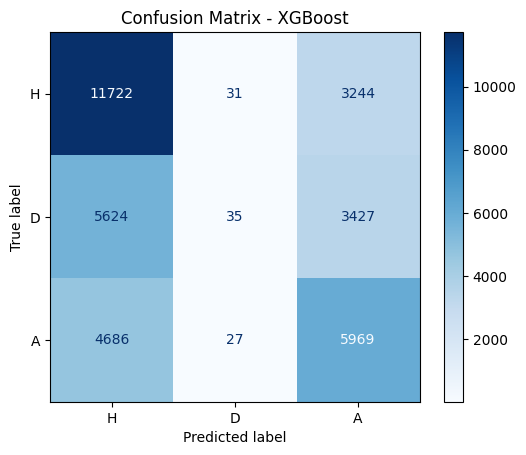


=== RandomForest ===
              precision    recall  f1-score   support

           H       0.53      0.79      0.63     14997
           D       0.52      0.00      0.00      9086
           A       0.48      0.55      0.51     10682

    accuracy                           0.51     34765
   macro avg       0.51      0.45      0.38     34765
weighted avg       0.51      0.51      0.43     34765



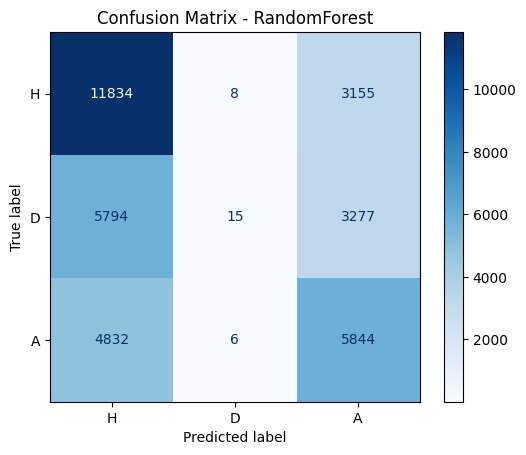


=== LogisticRegression ===
              precision    recall  f1-score   support

           H       0.53      0.80      0.63     14997
           D       0.38      0.01      0.03      9086
           A       0.48      0.53      0.51     10682

    accuracy                           0.51     34765
   macro avg       0.46      0.45      0.39     34765
weighted avg       0.48      0.51      0.44     34765



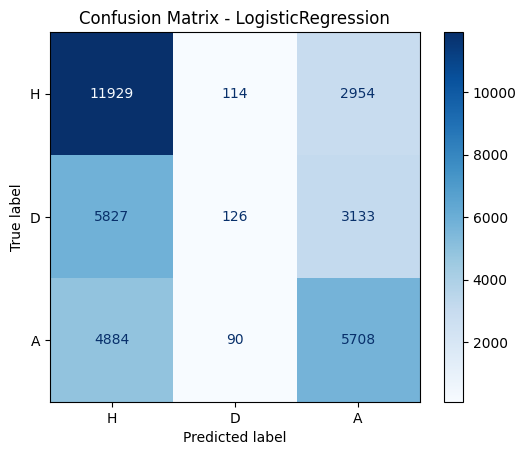


=== Ensemble ===
              precision    recall  f1-score   support

           H       0.55      0.73      0.62     14997
           D       0.33      0.14      0.20      9086
           A       0.49      0.50      0.50     10682

    accuracy                           0.51     34765
   macro avg       0.46      0.46      0.44     34765
weighted avg       0.47      0.51      0.47     34765



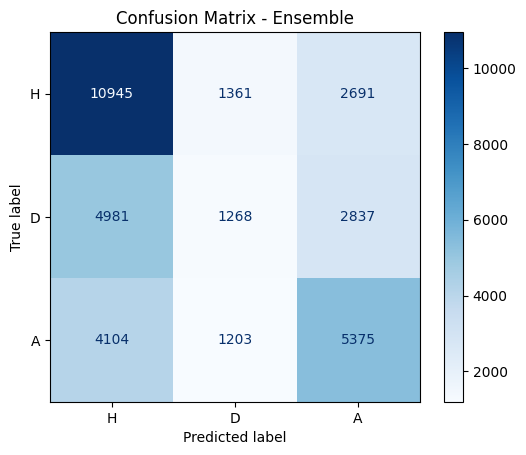

In [ ]:
# === Step 5: Evaluation ===
models_eval = {
    'XGBoost': calibrated_models['XGB'].predict(X_test_scaled),
    'RandomForest': calibrated_models['RF'].predict(X_test_scaled),
    'LogisticRegression': calibrated_models['LR'].predict(X_test_scaled),
    'Ensemble': ensemble_preds
}

for name, preds in models_eval.items():
    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds, target_names=['H', 'D', 'A']))
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["H", "D", "A"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [ ]:
from sklearn.metrics import brier_score_loss

print("\n=== BRIER SCORE (Probability Calibration Evaluation) ===")
for i, label in enumerate(['H', 'D', 'A']):
    brier = brier_score_loss((y_test == i).astype(int), ensemble_probs[:, i])
    print(f"Brier Score for class {label}: {brier:.4f}")


=== BRIER SCORE (Probability Calibration Evaluation) ===
Brier Score for class H: 0.2170
Brier Score for class D: 0.1924
Brier Score for class A: 0.1886


In [ ]:
for i in range(5):
    p = calibrated_models['LR'].predict_proba(X_test_scaled)[i]
    print(f"Match {i+1}: Probabilities → H: {p[0]:.2f}, D: {p[1]:.2f}, A: {p[2]:.2f} | Sum: {p.sum():.2f}")


Match 1: Probabilities → H: 0.74, D: 0.16, A: 0.09 | Sum: 1.00
Match 2: Probabilities → H: 0.21, D: 0.13, A: 0.66 | Sum: 1.00
Match 3: Probabilities → H: 0.48, D: 0.25, A: 0.28 | Sum: 1.00
Match 4: Probabilities → H: 0.59, D: 0.24, A: 0.17 | Sum: 1.00
Match 5: Probabilities → H: 0.59, D: 0.26, A: 0.15 | Sum: 1.00


In [ ]:
i = 0  # change index to inspect different matches
p = ensemble_probs[i]
print(f"Match {i+1} predicted probs → H: {p[0]:.2f}, D: {p[1]:.2f}, A: {p[2]:.2f}")
print("Predicted class:", ['H', 'D', 'A'][np.argmax(p)])
print("True class:", ['H', 'D', 'A'][y_test.iloc[i]])


Match 1 predicted probs → H: 0.70, D: 0.22, A: 0.08
Predicted class: H
True class: A


In [ ]:
print("Log Loss (Soft Voting Ensemble):", log_loss(y_test, ensemble_probs))


Log Loss (Soft Voting Ensemble): 1.0005008856987943


In [ ]:
threshold = 0.7
wrong_preds = []

for i in range(len(y_test)):
    true = y_test.iloc[i]
    pred = np.argmax(ensemble_probs[i])
    conf = ensemble_probs[i][pred]

    if pred != true and conf >= threshold:
        wrong_preds.append((i, conf, pred, true))

print(f"High-confidence wrong predictions: {len(wrong_preds)}")


High-confidence wrong predictions: 403


In [ ]:
import random

def sample_predictions(n=5, seed=42):
    random.seed(seed)
    indices = random.sample(range(len(y_test)), n)

    for i in indices:
        probs = ensemble_probs[i]
        pred_class = np.argmax(probs)
        true_class = y_test.iloc[i]

        print(f"\n Match {i+1}")
        print(f"  Predicted Probabilities → H: {probs[0]:.2f}, D: {probs[1]:.2f}, A: {probs[2]:.2f}")
        print(f"  Predicted Class: {['H', 'D', 'A'][pred_class]}")
        print(f"  True Class: {['H', 'D', 'A'][true_class]}")
        print(f"  Confidence: {probs[pred_class]:.2f}")
        print("   Correct" if pred_class == true_class else "   Incorrect")

# Run it
sample_predictions(n=5)



 Match 7297
  Predicted Probabilities → H: 0.37, D: 0.36, A: 0.27
  Predicted Class: H
  True Class: H
  Confidence: 0.37
   Correct

 Match 1640
  Predicted Probabilities → H: 0.68, D: 0.24, A: 0.07
  Predicted Class: H
  True Class: D
  Confidence: 0.68
   Incorrect

 Match 18025
  Predicted Probabilities → H: 0.83, D: 0.14, A: 0.03
  Predicted Class: H
  True Class: H
  Confidence: 0.83
   Correct

 Match 16050
  Predicted Probabilities → H: 0.42, D: 0.33, A: 0.25
  Predicted Class: H
  True Class: H
  Confidence: 0.42
   Correct

 Match 14629
  Predicted Probabilities → H: 0.86, D: 0.12, A: 0.01
  Predicted Class: H
  True Class: H
  Confidence: 0.86
   Correct


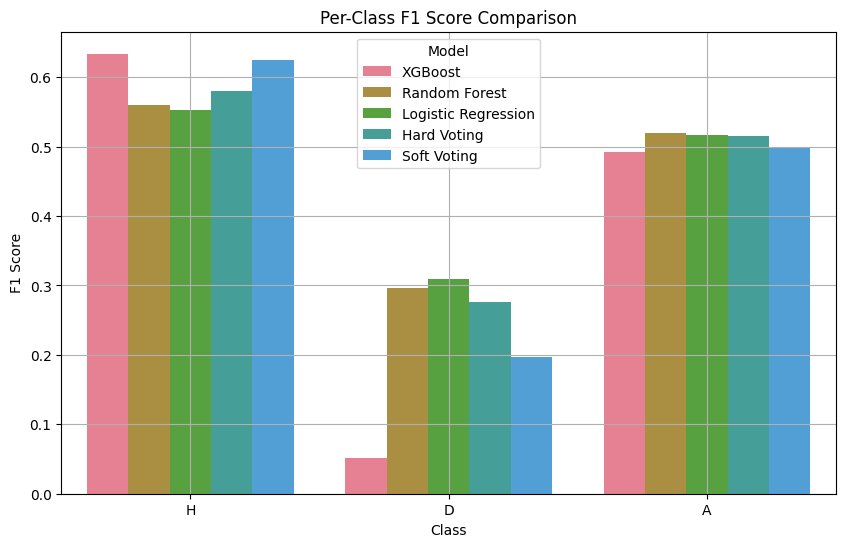

In [ ]:

from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_f1_dataframe(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    f1s = {label: report[label]['f1-score'] for label in ['0', '1', '2']}
    return pd.DataFrame({'Model': model_name, 'Class': ['H', 'D', 'A'], 'F1': list(f1s.values())})

# Create DataFrame for each model
dfs = [
    get_f1_dataframe(y_test, best_xgb.predict(X_test_scaled), "XGBoost"),
    get_f1_dataframe(y_test, best_rf.predict(X_test_scaled), "Random Forest"),
    get_f1_dataframe(y_test, lr_clf.predict(X_test_scaled), "Logistic Regression"),
    get_f1_dataframe(y_test, y_pred_ensemble, "Hard Voting"),
    get_f1_dataframe(y_test, np.argmax(ensemble_probs, axis=1), "Soft Voting")
]

df_all = pd.concat(dfs)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_all, x='Class', y='F1', hue='Model')
plt.title("Per-Class F1 Score Comparison")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


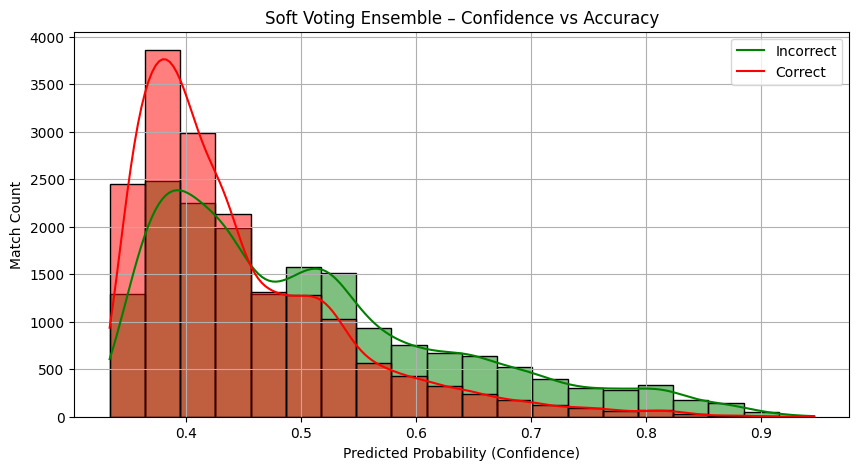

In [ ]:
def plot_confidence_vs_accuracy(probs, y_true, model_name="Soft Voting"):
    preds = np.argmax(probs, axis=1)
    max_confs = np.max(probs, axis=1)
    correct = preds == y_true

    plt.figure(figsize=(10, 5))
    sns.histplot(x=max_confs, hue=correct, bins=20, kde=True, palette={True: "green", False: "red"})
    plt.title(f"{model_name} – Confidence vs Accuracy")
    plt.xlabel("Predicted Probability (Confidence)")
    plt.ylabel("Match Count")
    plt.legend(["Incorrect", "Correct"])
    plt.grid(True)
    plt.show()

plot_confidence_vs_accuracy(ensemble_probs, y_test, "Soft Voting Ensemble")


In [ ]:
# Get average absolute coefficients (handles multi-class LR)
lr_importance = pd.Series(
    np.abs(lr_clf.coef_).mean(axis=0),
    index=features,
    name='LogisticRegression'
)


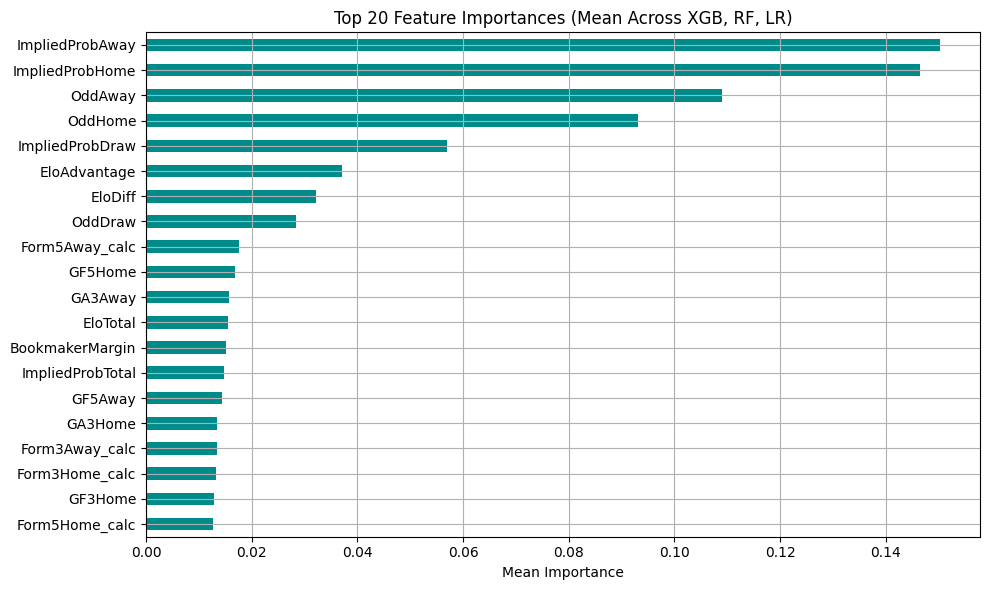

In [ ]:
# Store importances from individual models
importances = {
    'XGBoost': pd.Series(best_xgb.feature_importances_, index=features),
    'RandomForest': pd.Series(best_rf.feature_importances_, index=features),
    'LogisticRegression': lr_importance

}
importance_df = pd.DataFrame(importances)
importance_df['Mean'] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values('Mean', ascending=False)

# Plot top 20 features
# Top 20 features across all models
top_n = 20
importance_df['Mean'].head(top_n).sort_values().plot.barh(
    figsize=(10, 6), color='darkcyan'
)
plt.title("Top 20 Feature Importances (Mean Across XGB, RF, LR)")
plt.xlabel("Mean Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
display(importance_df.head(30).style.background_gradient(cmap='YlGnBu'))


,XGBoost,RandomForest,LogisticRegression,Mean
ImpliedProbAway,0.163696,0.151514,0.135759,0.150323
ImpliedProbHome,0.218896,0.115606,0.105136,0.146546
OddAway,0.152695,0.111490,0.062565,0.108917
OddHome,0.116523,0.129709,0.033037,0.093090
ImpliedProbDraw,0.054170,0.048793,0.067737,0.056900
EloAdvantage,0.012897,0.074805,0.023255,0.036986
EloDiff,0.012758,0.068978,0.014816,0.032184
OddDraw,0.026394,0.042327,0.016254,0.028325
Form5Away_calc,0.010194,0.014000,0.028724,0.017639
GF5Home,0.010114,0.012936,0.027401,0.016817


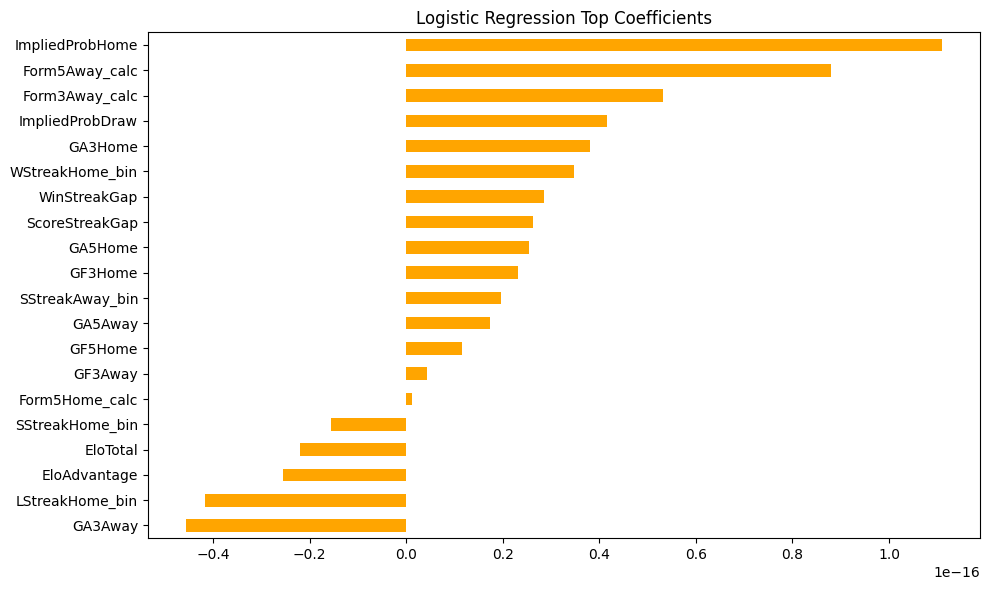

In [ ]:
# O Logistic Regression Coefficients
lr_weights = pd.Series(lr_clf.coef_.mean(axis=0), index=features)
lr_weights.sort_values().tail(20).plot.barh(figsize=(10, 6), color='orange')
plt.title("Logistic Regression Top Coefficients")
plt.tight_layout()
plt.show()


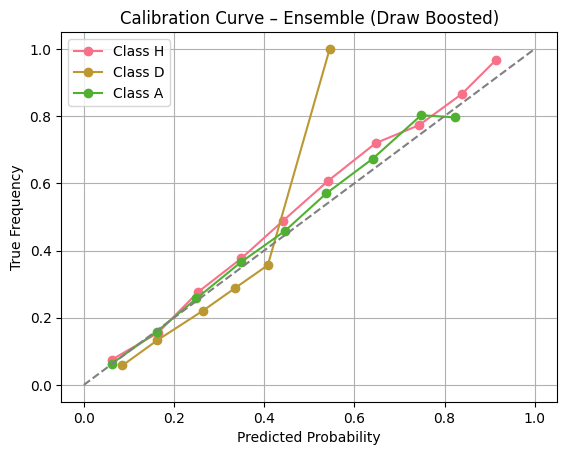

In [ ]:
#calibration curve
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

for i, label in enumerate(['H', 'D', 'A']):
    y_true_bin = (y_test == i).astype(int)
    prob_pred = ensemble_probs[:, i]

    prob_true, prob_pred_bin = calibration_curve(y_true_bin, prob_pred, n_bins=10, strategy='uniform')

    plt.plot(prob_pred_bin, prob_true, marker='o', label=f'Class {label}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Predicted Probability")
plt.ylabel("True Frequency")
plt.title("Calibration Curve – Ensemble (Draw Boosted)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import joblib
import json
import os

# Create export directories
os.makedirs('models', exist_ok=True)
os.makedirs('config', exist_ok=True)

### === Export Trained Models === ###
joblib.dump(calibrated_models['XGB'], 'models/xgb_model.pkl')
joblib.dump(calibrated_models['RF'], 'models/rf_model.pkl')
joblib.dump(calibrated_models['LR'], 'models/lr_model.pkl')

### === Export Scaler === ###
joblib.dump(scaler, 'models/scaler.pkl')

### === Export Feature List === ###
with open('config/feature_list.json', 'w') as f:
    json.dump(features, f)

### === Export Ensemble Weights and Draw Boost === ###
ensemble_config = {
    'weights': weights,
    'draw_boost': 1.3
}
with open('config/ensemble_config.json', 'w') as f:
    json.dump(ensemble_config, f)

### === Export Division-Wise Medians === ###
# Replace with your actual stored medians from training
elo_medians = {}
odds_medians = {}

for div in df['Division'].unique():
    elo_medians[div] = {
        'HomeElo': df[df['Division'] == div]['HomeElo'].median(),
        'AwayElo': df[df['Division'] == div]['AwayElo'].median()
    }
    odds_medians[div] = {
        'OddHome': df[df['Division'] == div]['OddHome'].median(),
        'OddDraw': df[df['Division'] == div]['OddDraw'].median(),
        'OddAway': df[df['Division'] == div]['OddAway'].median()
    }

division_medians = {
    'Elo': elo_medians,
    'Odds': odds_medians
}

joblib.dump(division_medians, 'config/division_medians.pkl')

print(" All model components exported successfully.")


 All model components exported successfully.
